In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [2]:
df=pd.read_csv('E:\\AppliedAI\\Quora\\final_features.csv')

In [3]:
df.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,-72.266625,-37.072086,-31.142730,94.064854,-45.053242,-34.155221,-76.548099,99.282776,50.791731,-17.566246
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,...,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,...,36.089472,47.193216,-49.969586,44.796028,39.740803,-33.763309,-98.282341,22.118795,68.802072,21.025373


In [4]:
df.drop(df.index[0], inplace=True)
y_true = df['is_duplicate']
df.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [5]:
df.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,6.193171,-65.084229,-15.654534,-3.475828,26.999802,170.172613,-57.038953,194.269546,128.207803,55.490061
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,...,-26.185226,-19.283218,75.602438,24.144027,-91.874398,-178.454113,-91.471482,19.922719,21.266690,49.574858
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,...,-17.779019,30.152297,49.300137,27.783795,25.937188,-32.107076,-3.817634,-14.231000,4.772115,7.711628
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,...,36.089472,47.193216,-49.969586,44.796028,39.740803,-33.763309,-98.282341,22.118795,68.802072,21.025373
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,...,-45.945059,-16.685298,-33.416315,-69.760385,-146.785263,-19.066042,12.203929,199.880774,68.090964,90.085963


In [6]:
cols = list(df.columns)
for i in cols:
    df[i] = df[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [7]:
y_true = list(map(int, y_true.values))

In [8]:
X_train,X_test, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.3)

In [9]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283002, 218)
Number of data points in test data : (121287, 218)


In [10]:
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)

Class 0:  0.6308011957512668 Class 1:  0.36919880424873325


In [11]:
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [12]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### WORST CASE POSSIBILITY

Log loss on Test Data using Random Model 0.8904404392255821


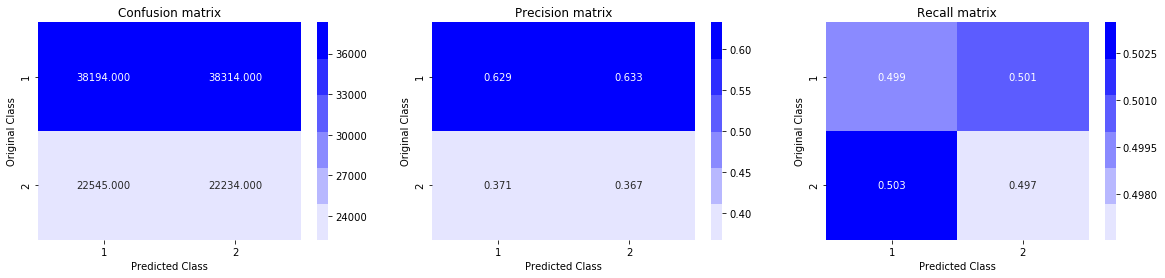

In [23]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.44602149569869287
For values of alpha =  0.0001 The log loss is: 0.45338745832383626
For values of alpha =  0.001 The log loss is: 0.44234252419257214
For values of alpha =  0.01 The log loss is: 0.432761604855043
For values of alpha =  0.1 The log loss is: 0.45516774192886267
For values of alpha =  1 The log loss is: 0.4851322170435219
For values of alpha =  10 The log loss is: 0.5322659889843734


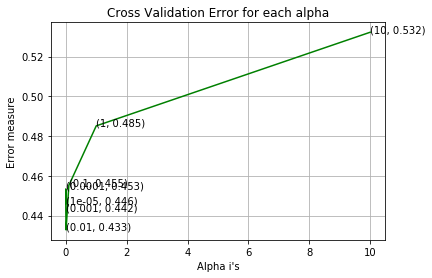

For values of best alpha =  0.01 The train log loss is: 0.4300786666121587
For values of best alpha =  0.01 The test log loss is: 0.432761604855043
Total number of data points : 121287


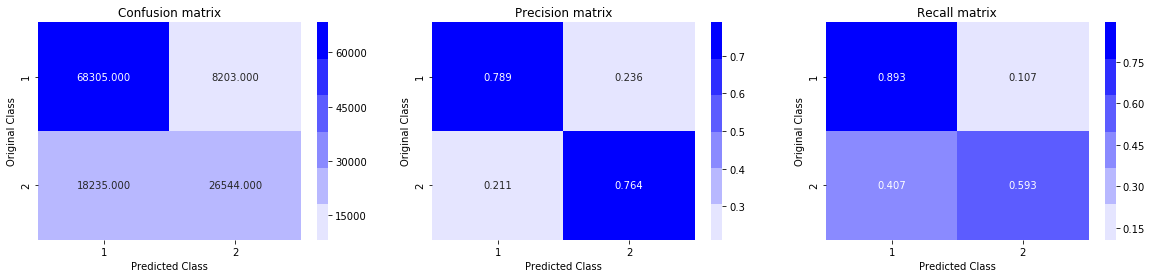

In [24]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [14]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68484	valid-logloss:0.68482
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61509	valid-logloss:0.61494
[20]	train-logloss:0.56465	valid-logloss:0.56452
[30]	train-logloss:0.52622	valid-logloss:0.52618
[40]	train-logloss:0.49703	valid-logloss:0.49711
[50]	train-logloss:0.47417	valid-logloss:0.47436
[60]	train-logloss:0.45585	valid-logloss:0.45613
[70]	train-logloss:0.44104	valid-logloss:0.44144
[80]	train-logloss:0.42911	valid-logloss:0.42967
[90]	train-logloss:0.41938	valid-logloss:0.42001
[100]	train-logloss:0.41143	valid-logloss:0.41218
[110]	train-logloss:0.40475	valid-logloss:0.40558
[120]	train-logloss:0.39911	valid-logloss:0.40009
[130]	train-logloss:0.39437	valid-logloss:0.39544
[140]	train-logloss:0.39039	valid-logloss:0.39161
[150]	train-logloss:0.38712	valid-logloss:0.38843
[160]	train-logloss:0.38414	valid-logloss:0.38557
[170]	trai

NameError: name 'clf' is not defined

In [15]:
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

The test log loss is: 0.35635227203188424


Total number of data points : 121287


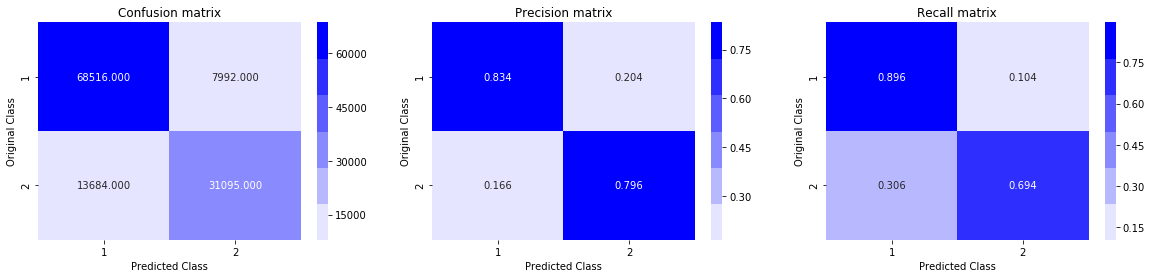

In [17]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',verbose=1, random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

-- Epoch 1
Norm: 91153.68, NNZs: 212, Bias: -4465.647425, T: 283002, Avg. loss: 176187.696342
Total training time: 0.32 seconds.
-- Epoch 2
Norm: 83209.60, NNZs: 212, Bias: -4409.042347, T: 566004, Avg. loss: 34130.414375
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 77961.38, NNZs: 214, Bias: -4281.386421, T: 849006, Avg. loss: 24024.373118
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 74166.13, NNZs: 211, Bias: -4169.872337, T: 1132008, Avg. loss: 19495.487622
Total training time: 1.30 seconds.
-- Epoch 5
Norm: 71282.19, NNZs: 211, Bias: -4077.587372, T: 1415010, Avg. loss: 16633.814150
Total training time: 1.61 seconds.
-- Epoch 6
Norm: 68964.22, NNZs: 208, Bias: -4003.557383, T: 1698012, Avg. loss: 14745.521771
Total training time: 1.94 seconds.
-- Epoch 7
Norm: 67027.16, NNZs: 200, Bias: -3944.830137, T: 1981014, Avg. loss: 13433.455721
Total training time: 2.26 seconds.
-- Epoch 8
Norm: 65374.92, NNZs: 200, Bias: -3898.696618, T: 2264016, Avg. loss: 12402.369611
Total

Norm: 41895.27, NNZs: 168, Bias: -4109.383276, T: 18112128, Avg. loss: 4812.543642
Total training time: 20.37 seconds.
-- Epoch 65
Norm: 41734.38, NNZs: 171, Bias: -4117.291161, T: 18395130, Avg. loss: 4785.845607
Total training time: 20.68 seconds.
-- Epoch 66
Norm: 41576.34, NNZs: 184, Bias: -4125.152970, T: 18678132, Avg. loss: 4750.868641
Total training time: 21.00 seconds.
-- Epoch 67
Norm: 41420.60, NNZs: 165, Bias: -4132.685212, T: 18961134, Avg. loss: 4730.847716
Total training time: 21.32 seconds.
-- Epoch 68
Norm: 41267.80, NNZs: 171, Bias: -4140.467425, T: 19244136, Avg. loss: 4688.580416
Total training time: 21.64 seconds.
-- Epoch 69
Norm: 41117.48, NNZs: 178, Bias: -4148.104649, T: 19527138, Avg. loss: 4660.221950
Total training time: 21.97 seconds.
-- Epoch 70
Norm: 40969.51, NNZs: 183, Bias: -4155.634028, T: 19810140, Avg. loss: 4632.265361
Total training time: 22.28 seconds.
-- Epoch 71
Norm: 40824.07, NNZs: 174, Bias: -4163.266833, T: 20093142, Avg. loss: 4597.902743


Norm: 35104.52, NNZs: 163, Bias: -4490.001399, T: 35941254, Avg. loss: 3492.612468
Total training time: 39.89 seconds.
-- Epoch 128
Norm: 35031.42, NNZs: 167, Bias: -4494.565482, T: 36224256, Avg. loss: 3476.074065
Total training time: 40.18 seconds.
-- Epoch 129
Norm: 34959.06, NNZs: 176, Bias: -4498.988944, T: 36507258, Avg. loss: 3460.629114
Total training time: 40.48 seconds.
-- Epoch 130
Norm: 34887.42, NNZs: 169, Bias: -4503.368447, T: 36790260, Avg. loss: 3445.007014
Total training time: 40.80 seconds.
-- Epoch 131
Norm: 34816.41, NNZs: 178, Bias: -4507.735402, T: 37073262, Avg. loss: 3432.017402
Total training time: 41.12 seconds.
-- Epoch 132
Norm: 34746.06, NNZs: 178, Bias: -4512.080165, T: 37356264, Avg. loss: 3418.436232
Total training time: 41.43 seconds.
-- Epoch 133
Norm: 34676.37, NNZs: 180, Bias: -4516.351699, T: 37639266, Avg. loss: 3404.720132
Total training time: 41.75 seconds.
-- Epoch 134
Norm: 34607.38, NNZs: 164, Bias: -4520.670754, T: 37922268, Avg. loss: 3387.

Norm: 31542.39, NNZs: 167, Bias: -4717.287987, T: 53770380, Avg. loss: 2752.005160
Total training time: 58.94 seconds.
-- Epoch 191
Norm: 31498.85, NNZs: 180, Bias: -4720.136790, T: 54053382, Avg. loss: 2743.814595
Total training time: 59.31 seconds.
-- Epoch 192
Norm: 31455.62, NNZs: 175, Bias: -4723.048350, T: 54336384, Avg. loss: 2733.559901
Total training time: 59.61 seconds.
-- Epoch 193
Norm: 31412.71, NNZs: 173, Bias: -4725.851004, T: 54619386, Avg. loss: 2724.520140
Total training time: 59.91 seconds.
-- Epoch 194
Norm: 31370.06, NNZs: 178, Bias: -4728.794327, T: 54902388, Avg. loss: 2716.512822
Total training time: 60.20 seconds.
-- Epoch 195
Norm: 31327.76, NNZs: 179, Bias: -4731.549886, T: 55185390, Avg. loss: 2706.203977
Total training time: 60.50 seconds.
-- Epoch 196
Norm: 31285.73, NNZs: 172, Bias: -4734.409040, T: 55468392, Avg. loss: 2697.279671
Total training time: 60.80 seconds.
-- Epoch 197
Norm: 31243.99, NNZs: 177, Bias: -4737.142256, T: 55751394, Avg. loss: 2688.

Norm: 29296.75, NNZs: 176, Bias: -4870.571069, T: 71599506, Avg. loss: 2246.775788
Total training time: 77.79 seconds.
-- Epoch 254
Norm: 29267.79, NNZs: 177, Bias: -4872.587860, T: 71882508, Avg. loss: 2240.465356
Total training time: 78.09 seconds.
-- Epoch 255
Norm: 29239.00, NNZs: 175, Bias: -4874.630029, T: 72165510, Avg. loss: 2233.774710
Total training time: 78.38 seconds.
-- Epoch 256
Norm: 29210.40, NNZs: 179, Bias: -4876.639265, T: 72448512, Avg. loss: 2224.848253
Total training time: 78.68 seconds.
-- Epoch 257
Norm: 29181.97, NNZs: 179, Bias: -4878.609082, T: 72731514, Avg. loss: 2219.732936
Total training time: 78.97 seconds.
-- Epoch 258
Norm: 29153.71, NNZs: 174, Bias: -4880.663266, T: 73014516, Avg. loss: 2210.571870
Total training time: 79.26 seconds.
-- Epoch 259
Norm: 29125.61, NNZs: 177, Bias: -4882.643710, T: 73297518, Avg. loss: 2205.417170
Total training time: 79.54 seconds.
-- Epoch 260
Norm: 29097.64, NNZs: 177, Bias: -4884.608533, T: 73580520, Avg. loss: 2200.

Norm: 27760.24, NNZs: 178, Bias: -4981.742044, T: 89428632, Avg. loss: 1862.711034
Total training time: 97.28 seconds.
-- Epoch 317
Norm: 27739.84, NNZs: 182, Bias: -4983.281443, T: 89711634, Avg. loss: 1859.100935
Total training time: 97.61 seconds.
-- Epoch 318
Norm: 27719.59, NNZs: 185, Bias: -4984.778316, T: 89994636, Avg. loss: 1851.199549
Total training time: 97.93 seconds.
-- Epoch 319
Norm: 27699.42, NNZs: 180, Bias: -4986.318161, T: 90277638, Avg. loss: 1847.829900
Total training time: 98.22 seconds.
-- Epoch 320
Norm: 27679.35, NNZs: 186, Bias: -4987.865197, T: 90560640, Avg. loss: 1841.651757
Total training time: 98.52 seconds.
-- Epoch 321
Norm: 27659.40, NNZs: 186, Bias: -4989.372150, T: 90843642, Avg. loss: 1836.521168
Total training time: 98.80 seconds.
-- Epoch 322
Norm: 27639.56, NNZs: 182, Bias: -4990.862363, T: 91126644, Avg. loss: 1829.599961
Total training time: 99.09 seconds.
-- Epoch 323
Norm: 27619.82, NNZs: 183, Bias: -4992.323847, T: 91409646, Avg. loss: 1826.

Norm: 26675.18, NNZs: 189, Bias: -5065.240747, T: 106974756, Avg. loss: 1563.166878
Total training time: 115.78 seconds.
-- Epoch 379
Norm: 26660.27, NNZs: 182, Bias: -5066.448663, T: 107257758, Avg. loss: 1558.083748
Total training time: 116.07 seconds.
-- Epoch 380
Norm: 26645.45, NNZs: 184, Bias: -5067.629221, T: 107540760, Avg. loss: 1553.522093
Total training time: 116.37 seconds.
-- Epoch 381
Norm: 26630.70, NNZs: 185, Bias: -5068.789918, T: 107823762, Avg. loss: 1549.095332
Total training time: 116.66 seconds.
-- Epoch 382
Norm: 26616.02, NNZs: 181, Bias: -5069.972613, T: 108106764, Avg. loss: 1544.102494
Total training time: 116.95 seconds.
-- Epoch 383
Norm: 26601.42, NNZs: 184, Bias: -5071.108860, T: 108389766, Avg. loss: 1539.534579
Total training time: 117.25 seconds.
-- Epoch 384
Norm: 26586.86, NNZs: 184, Bias: -5072.273461, T: 108672768, Avg. loss: 1537.143826
Total training time: 117.54 seconds.
-- Epoch 385
Norm: 26572.38, NNZs: 179, Bias: -5073.435886, T: 108955770, A

Norm: 25873.35, NNZs: 183, Bias: -5130.744204, T: 124520880, Avg. loss: 1315.525341
Total training time: 134.25 seconds.
-- Epoch 441
Norm: 25862.24, NNZs: 177, Bias: -5131.684298, T: 124803882, Avg. loss: 1310.199142
Total training time: 134.57 seconds.
-- Epoch 442
Norm: 25851.16, NNZs: 174, Bias: -5132.618266, T: 125086884, Avg. loss: 1308.350042
Total training time: 134.87 seconds.
-- Epoch 443
Norm: 25840.13, NNZs: 182, Bias: -5133.571743, T: 125369886, Avg. loss: 1305.024078
Total training time: 135.19 seconds.
-- Epoch 444
Norm: 25829.16, NNZs: 182, Bias: -5134.513395, T: 125652888, Avg. loss: 1301.080108
Total training time: 135.49 seconds.
-- Epoch 445
Norm: 25818.24, NNZs: 181, Bias: -5135.441866, T: 125935890, Avg. loss: 1297.831935
Total training time: 135.78 seconds.
-- Epoch 446
Norm: 25807.36, NNZs: 180, Bias: -5136.374554, T: 126218892, Avg. loss: 1294.159112
Total training time: 136.07 seconds.
-- Epoch 447
Norm: 25796.54, NNZs: 183, Bias: -5137.318625, T: 126501894, A

Norm: 25270.73, NNZs: 178, Bias: -5182.933691, T: 142067004, Avg. loss: 1110.164440
Total training time: 152.89 seconds.
-- Epoch 503
Norm: 25262.32, NNZs: 181, Bias: -5183.662855, T: 142350006, Avg. loss: 1106.652054
Total training time: 153.18 seconds.
-- Epoch 504
Norm: 25253.93, NNZs: 179, Bias: -5184.419362, T: 142633008, Avg. loss: 1104.284094
Total training time: 153.47 seconds.
-- Epoch 505
Norm: 25245.57, NNZs: 181, Bias: -5185.187642, T: 142916010, Avg. loss: 1100.861027
Total training time: 153.76 seconds.
-- Epoch 506
Norm: 25237.26, NNZs: 186, Bias: -5185.949504, T: 143199012, Avg. loss: 1098.230396
Total training time: 154.04 seconds.
-- Epoch 507
Norm: 25228.98, NNZs: 179, Bias: -5186.656869, T: 143482014, Avg. loss: 1095.176412
Total training time: 154.35 seconds.
-- Epoch 508
Norm: 25220.75, NNZs: 172, Bias: -5187.408086, T: 143765016, Avg. loss: 1090.601248
Total training time: 154.68 seconds.
-- Epoch 509
Norm: 25212.56, NNZs: 182, Bias: -5188.132841, T: 144048018, A

Norm: 24812.41, NNZs: 170, Bias: -5224.778788, T: 159613128, Avg. loss: 936.739148
Total training time: 171.13 seconds.
-- Epoch 565
Norm: 24805.97, NNZs: 182, Bias: -5225.397225, T: 159896130, Avg. loss: 933.524074
Total training time: 171.42 seconds.
-- Epoch 566
Norm: 24799.56, NNZs: 176, Bias: -5226.012039, T: 160179132, Avg. loss: 931.807243
Total training time: 171.74 seconds.
-- Epoch 567
Norm: 24793.18, NNZs: 178, Bias: -5226.597093, T: 160462134, Avg. loss: 928.363187
Total training time: 172.06 seconds.
-- Epoch 568
Norm: 24786.84, NNZs: 184, Bias: -5227.189212, T: 160745136, Avg. loss: 925.515470
Total training time: 172.38 seconds.
-- Epoch 569
Norm: 24780.52, NNZs: 173, Bias: -5227.765987, T: 161028138, Avg. loss: 923.746054
Total training time: 172.71 seconds.
-- Epoch 570
Norm: 24774.22, NNZs: 172, Bias: -5228.339891, T: 161311140, Avg. loss: 922.528522
Total training time: 173.01 seconds.
-- Epoch 571
Norm: 24767.94, NNZs: 177, Bias: -5228.932620, T: 161594142, Avg. los

Norm: 24460.32, NNZs: 182, Bias: -5258.338018, T: 177159252, Avg. loss: 793.317397
Total training time: 189.73 seconds.
-- Epoch 627
Norm: 24455.34, NNZs: 178, Bias: -5258.832637, T: 177442254, Avg. loss: 791.559509
Total training time: 190.03 seconds.
-- Epoch 628
Norm: 24450.39, NNZs: 183, Bias: -5259.312956, T: 177725256, Avg. loss: 788.792509
Total training time: 190.33 seconds.
-- Epoch 629
Norm: 24445.46, NNZs: 178, Bias: -5259.784620, T: 178008258, Avg. loss: 787.263194
Total training time: 190.63 seconds.
-- Epoch 630
Norm: 24440.56, NNZs: 181, Bias: -5260.254444, T: 178291260, Avg. loss: 784.996927
Total training time: 190.93 seconds.
-- Epoch 631
Norm: 24435.67, NNZs: 175, Bias: -5260.742016, T: 178574262, Avg. loss: 782.577982
Total training time: 191.23 seconds.
-- Epoch 632
Norm: 24430.79, NNZs: 184, Bias: -5261.228259, T: 178857264, Avg. loss: 780.565621
Total training time: 191.52 seconds.
-- Epoch 633
Norm: 24425.94, NNZs: 180, Bias: -5261.695287, T: 179140266, Avg. los

Norm: 24186.99, NNZs: 176, Bias: -5285.087350, T: 194705376, Avg. loss: 675.567709
Total training time: 208.10 seconds.
-- Epoch 689
Norm: 24183.11, NNZs: 176, Bias: -5285.457388, T: 194988378, Avg. loss: 674.208057
Total training time: 208.39 seconds.
-- Epoch 690
Norm: 24179.24, NNZs: 177, Bias: -5285.839698, T: 195271380, Avg. loss: 672.562357
Total training time: 208.69 seconds.
-- Epoch 691
Norm: 24175.38, NNZs: 181, Bias: -5286.217856, T: 195554382, Avg. loss: 671.148693
Total training time: 208.98 seconds.
-- Epoch 692
Norm: 24171.55, NNZs: 176, Bias: -5286.601108, T: 195837384, Avg. loss: 669.058317
Total training time: 209.28 seconds.
-- Epoch 693
Norm: 24167.72, NNZs: 177, Bias: -5286.988391, T: 196120386, Avg. loss: 666.940740
Total training time: 209.58 seconds.
-- Epoch 694
Norm: 24163.92, NNZs: 177, Bias: -5287.346062, T: 196403388, Avg. loss: 665.381930
Total training time: 209.87 seconds.
-- Epoch 695
Norm: 24160.12, NNZs: 182, Bias: -5287.740872, T: 196686390, Avg. los

Norm: 23972.04, NNZs: 174, Bias: -5306.078104, T: 212251500, Avg. loss: 581.609600
Total training time: 226.13 seconds.
-- Epoch 751
Norm: 23968.96, NNZs: 180, Bias: -5306.366708, T: 212534502, Avg. loss: 580.609645
Total training time: 226.42 seconds.
-- Epoch 752
Norm: 23965.88, NNZs: 174, Bias: -5306.667144, T: 212817504, Avg. loss: 579.249075
Total training time: 226.70 seconds.
-- Epoch 753
Norm: 23962.83, NNZs: 181, Bias: -5306.955927, T: 213100506, Avg. loss: 577.716597
Total training time: 227.00 seconds.
-- Epoch 754
Norm: 23959.78, NNZs: 177, Bias: -5307.247140, T: 213383508, Avg. loss: 576.386846
Total training time: 227.29 seconds.
-- Epoch 755
Norm: 23956.74, NNZs: 174, Bias: -5307.538443, T: 213666510, Avg. loss: 575.045651
Total training time: 227.57 seconds.
-- Epoch 756
Norm: 23953.72, NNZs: 173, Bias: -5307.827018, T: 213949512, Avg. loss: 573.509766
Total training time: 227.86 seconds.
-- Epoch 757
Norm: 23950.70, NNZs: 178, Bias: -5308.108660, T: 214232514, Avg. los

Norm: 23799.83, NNZs: 172, Bias: -5322.226077, T: 229797624, Avg. loss: 509.466022
Total training time: 244.18 seconds.
-- Epoch 813
Norm: 23797.33, NNZs: 175, Bias: -5322.463532, T: 230080626, Avg. loss: 508.280913
Total training time: 244.47 seconds.
-- Epoch 814
Norm: 23794.84, NNZs: 174, Bias: -5322.691556, T: 230363628, Avg. loss: 507.242175
Total training time: 244.77 seconds.
-- Epoch 815
Norm: 23792.36, NNZs: 178, Bias: -5322.921048, T: 230646630, Avg. loss: 506.565002
Total training time: 245.07 seconds.
-- Epoch 816
Norm: 23789.88, NNZs: 177, Bias: -5323.149392, T: 230929632, Avg. loss: 505.613646
Total training time: 245.37 seconds.
-- Epoch 817
Norm: 23787.42, NNZs: 174, Bias: -5323.356681, T: 231212634, Avg. loss: 505.165587
Total training time: 245.66 seconds.
-- Epoch 818
Norm: 23784.96, NNZs: 169, Bias: -5323.592247, T: 231495636, Avg. loss: 503.635112
Total training time: 245.95 seconds.
-- Epoch 819
Norm: 23782.51, NNZs: 176, Bias: -5323.797307, T: 231778638, Avg. los

Norm: 23658.51, NNZs: 171, Bias: -5334.393314, T: 247343748, Avg. loss: 455.419749
Total training time: 262.36 seconds.
-- Epoch 875
Norm: 23656.44, NNZs: 166, Bias: -5334.546451, T: 247626750, Avg. loss: 454.768644
Total training time: 262.65 seconds.
-- Epoch 876
Norm: 23654.36, NNZs: 170, Bias: -5334.722417, T: 247909752, Avg. loss: 453.997751
Total training time: 262.95 seconds.
-- Epoch 877
Norm: 23652.30, NNZs: 169, Bias: -5334.889710, T: 248192754, Avg. loss: 453.184311
Total training time: 263.24 seconds.
-- Epoch 878
Norm: 23650.24, NNZs: 163, Bias: -5335.047157, T: 248475756, Avg. loss: 452.446055
Total training time: 263.54 seconds.
-- Epoch 879
Norm: 23648.19, NNZs: 169, Bias: -5335.211655, T: 248758758, Avg. loss: 451.431625
Total training time: 263.83 seconds.
-- Epoch 880
Norm: 23646.14, NNZs: 171, Bias: -5335.364326, T: 249041760, Avg. loss: 451.183063
Total training time: 264.13 seconds.
-- Epoch 881
Norm: 23644.10, NNZs: 179, Bias: -5335.528455, T: 249324762, Avg. los

Norm: 23539.41, NNZs: 168, Bias: -5343.022994, T: 264889872, Avg. loss: 417.555765
Total training time: 280.63 seconds.
-- Epoch 937
Norm: 23537.63, NNZs: 174, Bias: -5343.145995, T: 265172874, Avg. loss: 417.162594
Total training time: 280.93 seconds.
-- Epoch 938
Norm: 23535.86, NNZs: 167, Bias: -5343.254546, T: 265455876, Avg. loss: 416.293333
Total training time: 281.22 seconds.
-- Epoch 939
Norm: 23534.09, NNZs: 163, Bias: -5343.369383, T: 265738878, Avg. loss: 416.210840
Total training time: 281.51 seconds.
-- Epoch 940
Norm: 23532.33, NNZs: 167, Bias: -5343.485977, T: 266021880, Avg. loss: 415.179890
Total training time: 281.81 seconds.
-- Epoch 941
Norm: 23530.56, NNZs: 167, Bias: -5343.606572, T: 266304882, Avg. loss: 415.188493
Total training time: 282.10 seconds.
-- Epoch 942
Norm: 23528.81, NNZs: 173, Bias: -5343.716908, T: 266587884, Avg. loss: 414.900022
Total training time: 282.39 seconds.
-- Epoch 943
Norm: 23527.06, NNZs: 169, Bias: -5343.821130, T: 266870886, Avg. los

Norm: 23436.18, NNZs: 170, Bias: -5349.117857, T: 282435996, Avg. loss: 390.913526
Total training time: 298.95 seconds.
-- Epoch 999
Norm: 23434.62, NNZs: 173, Bias: -5349.188994, T: 282718998, Avg. loss: 390.311971
Total training time: 299.25 seconds.
-- Epoch 1000
Norm: 23433.06, NNZs: 171, Bias: -5349.285863, T: 283002000, Avg. loss: 389.018791
Total training time: 299.54 seconds.
-- Epoch 1
Norm: 90916.72, NNZs: 214, Bias: -4141.503370, T: 226401, Avg. loss: 209095.072492
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 84223.85, NNZs: 213, Bias: -4170.218214, T: 452802, Avg. loss: 39523.818552
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 79417.65, NNZs: 208, Bias: -4083.340826, T: 679203, Avg. loss: 26956.727216
Total training time: 0.76 seconds.
-- Epoch 4
Norm: 75839.73, NNZs: 207, Bias: -3989.104197, T: 905604, Avg. loss: 21604.475736
Total training time: 1.01 seconds.
-- Epoch 5
Norm: 73039.99, NNZs: 208, Bias: -3906.395417, T: 1132005, Avg. loss: 18471.235073
Total 

Norm: 44060.13, NNZs: 175, Bias: -3781.147803, T: 14036862, Avg. loss: 5238.217890
Total training time: 15.27 seconds.
-- Epoch 63
Norm: 43892.05, NNZs: 180, Bias: -3788.352739, T: 14263263, Avg. loss: 5207.201862
Total training time: 15.51 seconds.
-- Epoch 64
Norm: 43726.92, NNZs: 178, Bias: -3795.389099, T: 14489664, Avg. loss: 5175.915910
Total training time: 15.75 seconds.
-- Epoch 65
Norm: 43564.61, NNZs: 179, Bias: -3802.788139, T: 14716065, Avg. loss: 5137.379463
Total training time: 16.00 seconds.
-- Epoch 66
Norm: 43405.07, NNZs: 176, Bias: -3809.944476, T: 14942466, Avg. loss: 5102.621135
Total training time: 16.24 seconds.
-- Epoch 67
Norm: 43248.17, NNZs: 181, Bias: -3817.094325, T: 15168867, Avg. loss: 5072.517994
Total training time: 16.49 seconds.
-- Epoch 68
Norm: 43093.67, NNZs: 183, Bias: -3824.138536, T: 15395268, Avg. loss: 5043.223351
Total training time: 16.73 seconds.
-- Epoch 69
Norm: 42941.72, NNZs: 180, Bias: -3831.073960, T: 15621669, Avg. loss: 5011.740403


Norm: 36966.50, NNZs: 172, Bias: -4148.009836, T: 28300125, Avg. loss: 3843.901047
Total training time: 30.41 seconds.
-- Epoch 126
Norm: 36889.83, NNZs: 164, Bias: -4152.514221, T: 28526526, Avg. loss: 3827.963214
Total training time: 30.65 seconds.
-- Epoch 127
Norm: 36813.87, NNZs: 178, Bias: -4157.062728, T: 28752927, Avg. loss: 3812.303543
Total training time: 30.89 seconds.
-- Epoch 128
Norm: 36738.60, NNZs: 181, Bias: -4161.506944, T: 28979328, Avg. loss: 3799.739587
Total training time: 31.12 seconds.
-- Epoch 129
Norm: 36663.95, NNZs: 182, Bias: -4165.898688, T: 29205729, Avg. loss: 3787.658430
Total training time: 31.36 seconds.
-- Epoch 130
Norm: 36590.04, NNZs: 180, Bias: -4170.249927, T: 29432130, Avg. loss: 3771.518855
Total training time: 31.61 seconds.
-- Epoch 131
Norm: 36516.87, NNZs: 182, Bias: -4174.584926, T: 29658531, Avg. loss: 3754.085827
Total training time: 31.84 seconds.
-- Epoch 132
Norm: 36444.30, NNZs: 178, Bias: -4178.840117, T: 29884932, Avg. loss: 3743.

Norm: 33200.47, NNZs: 172, Bias: -4379.667740, T: 42563388, Avg. loss: 3091.951687
Total training time: 45.25 seconds.
-- Epoch 189
Norm: 33153.95, NNZs: 180, Bias: -4382.662037, T: 42789789, Avg. loss: 3082.098245
Total training time: 45.48 seconds.
-- Epoch 190
Norm: 33107.76, NNZs: 184, Bias: -4385.642742, T: 43016190, Avg. loss: 3070.063911
Total training time: 45.71 seconds.
-- Epoch 191
Norm: 33061.85, NNZs: 179, Bias: -4388.614877, T: 43242591, Avg. loss: 3063.512262
Total training time: 45.96 seconds.
-- Epoch 192
Norm: 33016.26, NNZs: 177, Bias: -4391.580628, T: 43468992, Avg. loss: 3053.004285
Total training time: 46.19 seconds.
-- Epoch 193
Norm: 32971.04, NNZs: 182, Bias: -4394.462373, T: 43695393, Avg. loss: 3040.423930
Total training time: 46.42 seconds.
-- Epoch 194
Norm: 32926.09, NNZs: 181, Bias: -4397.365406, T: 43921794, Avg. loss: 3032.381619
Total training time: 46.65 seconds.
-- Epoch 195
Norm: 32881.41, NNZs: 181, Bias: -4400.260182, T: 44148195, Avg. loss: 3025.

Norm: 30779.44, NNZs: 179, Bias: -4539.079631, T: 56826651, Avg. loss: 2571.987776
Total training time: 59.93 seconds.
-- Epoch 252
Norm: 30747.89, NNZs: 179, Bias: -4541.273002, T: 57053052, Avg. loss: 2562.601068
Total training time: 60.17 seconds.
-- Epoch 253
Norm: 30716.48, NNZs: 173, Bias: -4543.424310, T: 57279453, Avg. loss: 2558.841119
Total training time: 60.40 seconds.
-- Epoch 254
Norm: 30685.24, NNZs: 185, Bias: -4545.534127, T: 57505854, Avg. loss: 2552.128160
Total training time: 60.64 seconds.
-- Epoch 255
Norm: 30654.19, NNZs: 173, Bias: -4547.698120, T: 57732255, Avg. loss: 2542.017044
Total training time: 60.87 seconds.
-- Epoch 256
Norm: 30623.34, NNZs: 180, Bias: -4549.775997, T: 57958656, Avg. loss: 2535.297758
Total training time: 61.10 seconds.
-- Epoch 257
Norm: 30592.65, NNZs: 185, Bias: -4551.881844, T: 58185057, Avg. loss: 2528.900799
Total training time: 61.33 seconds.
-- Epoch 258
Norm: 30562.09, NNZs: 179, Bias: -4553.964020, T: 58411458, Avg. loss: 2524.

Norm: 29084.57, NNZs: 192, Bias: -4657.090409, T: 71089914, Avg. loss: 2179.499504
Total training time: 74.55 seconds.
-- Epoch 315
Norm: 29061.80, NNZs: 177, Bias: -4658.701202, T: 71316315, Avg. loss: 2175.539813
Total training time: 74.78 seconds.
-- Epoch 316
Norm: 29039.12, NNZs: 182, Bias: -4660.347468, T: 71542716, Avg. loss: 2170.929523
Total training time: 75.01 seconds.
-- Epoch 317
Norm: 29016.56, NNZs: 178, Bias: -4661.989932, T: 71769117, Avg. loss: 2164.913279
Total training time: 75.24 seconds.
-- Epoch 318
Norm: 28994.12, NNZs: 183, Bias: -4663.636971, T: 71995518, Avg. loss: 2157.451680
Total training time: 75.47 seconds.
-- Epoch 319
Norm: 28971.81, NNZs: 183, Bias: -4665.199773, T: 72221919, Avg. loss: 2151.126868
Total training time: 75.70 seconds.
-- Epoch 320
Norm: 28949.58, NNZs: 178, Bias: -4666.810146, T: 72448320, Avg. loss: 2147.654713
Total training time: 75.93 seconds.
-- Epoch 321
Norm: 28927.47, NNZs: 182, Bias: -4668.368779, T: 72674721, Avg. loss: 2141.

Norm: 27839.60, NNZs: 180, Bias: -4748.463756, T: 85353177, Avg. loss: 1867.295909
Total training time: 89.09 seconds.
-- Epoch 378
Norm: 27822.57, NNZs: 174, Bias: -4749.716754, T: 85579578, Avg. loss: 1863.256422
Total training time: 89.33 seconds.
-- Epoch 379
Norm: 27805.63, NNZs: 182, Bias: -4750.982845, T: 85805979, Avg. loss: 1857.356552
Total training time: 89.56 seconds.
-- Epoch 380
Norm: 27788.74, NNZs: 179, Bias: -4752.294430, T: 86032380, Avg. loss: 1853.901790
Total training time: 89.79 seconds.
-- Epoch 381
Norm: 27771.92, NNZs: 191, Bias: -4753.567732, T: 86258781, Avg. loss: 1851.495123
Total training time: 90.02 seconds.
-- Epoch 382
Norm: 27755.18, NNZs: 182, Bias: -4754.845809, T: 86485182, Avg. loss: 1845.169131
Total training time: 90.25 seconds.
-- Epoch 383
Norm: 27738.50, NNZs: 182, Bias: -4756.121701, T: 86711583, Avg. loss: 1841.842221
Total training time: 90.48 seconds.
-- Epoch 384
Norm: 27721.93, NNZs: 179, Bias: -4757.376961, T: 86937984, Avg. loss: 1834.

Norm: 26910.75, NNZs: 187, Bias: -4820.241470, T: 99390039, Avg. loss: 1611.161574
Total training time: 103.41 seconds.
-- Epoch 440
Norm: 26897.66, NNZs: 186, Bias: -4821.324820, T: 99616440, Avg. loss: 1607.831026
Total training time: 103.64 seconds.
-- Epoch 441
Norm: 26884.63, NNZs: 185, Bias: -4822.363583, T: 99842841, Avg. loss: 1604.269851
Total training time: 103.87 seconds.
-- Epoch 442
Norm: 26871.65, NNZs: 184, Bias: -4823.392983, T: 100069242, Avg. loss: 1599.926401
Total training time: 104.10 seconds.
-- Epoch 443
Norm: 26858.71, NNZs: 187, Bias: -4824.422022, T: 100295643, Avg. loss: 1598.498226
Total training time: 104.33 seconds.
-- Epoch 444
Norm: 26845.83, NNZs: 187, Bias: -4825.448820, T: 100522044, Avg. loss: 1594.086621
Total training time: 104.57 seconds.
-- Epoch 445
Norm: 26833.00, NNZs: 178, Bias: -4826.463374, T: 100748445, Avg. loss: 1589.974177
Total training time: 104.79 seconds.
-- Epoch 446
Norm: 26820.22, NNZs: 183, Bias: -4827.499391, T: 100974846, Avg.

Norm: 26191.29, NNZs: 179, Bias: -4878.920936, T: 113426901, Avg. loss: 1396.067402
Total training time: 117.67 seconds.
-- Epoch 502
Norm: 26181.07, NNZs: 184, Bias: -4879.778710, T: 113653302, Avg. loss: 1392.537024
Total training time: 117.91 seconds.
-- Epoch 503
Norm: 26170.89, NNZs: 184, Bias: -4880.629547, T: 113879703, Avg. loss: 1390.575730
Total training time: 118.14 seconds.
-- Epoch 504
Norm: 26160.76, NNZs: 179, Bias: -4881.489184, T: 114106104, Avg. loss: 1385.743662
Total training time: 118.37 seconds.
-- Epoch 505
Norm: 26150.65, NNZs: 185, Bias: -4882.340999, T: 114332505, Avg. loss: 1383.989452
Total training time: 118.59 seconds.
-- Epoch 506
Norm: 26140.59, NNZs: 178, Bias: -4883.171049, T: 114558906, Avg. loss: 1380.775868
Total training time: 118.83 seconds.
-- Epoch 507
Norm: 26130.57, NNZs: 187, Bias: -4884.039562, T: 114785307, Avg. loss: 1376.840843
Total training time: 119.06 seconds.
-- Epoch 508
Norm: 26120.58, NNZs: 180, Bias: -4884.885491, T: 115011708, A

Norm: 25626.59, NNZs: 182, Bias: -4927.564130, T: 127463763, Avg. loss: 1211.384819
Total training time: 131.92 seconds.
-- Epoch 564
Norm: 25618.51, NNZs: 185, Bias: -4928.295419, T: 127690164, Avg. loss: 1209.116535
Total training time: 132.15 seconds.
-- Epoch 565
Norm: 25610.49, NNZs: 186, Bias: -4929.005031, T: 127916565, Avg. loss: 1204.799227
Total training time: 132.38 seconds.
-- Epoch 566
Norm: 25602.48, NNZs: 192, Bias: -4929.737647, T: 128142966, Avg. loss: 1203.331873
Total training time: 132.61 seconds.
-- Epoch 567
Norm: 25594.50, NNZs: 181, Bias: -4930.429196, T: 128369367, Avg. loss: 1201.035563
Total training time: 132.84 seconds.
-- Epoch 568
Norm: 25586.56, NNZs: 177, Bias: -4931.147563, T: 128595768, Avg. loss: 1196.319480
Total training time: 133.07 seconds.
-- Epoch 569
Norm: 25578.65, NNZs: 182, Bias: -4931.876316, T: 128822169, Avg. loss: 1193.523503
Total training time: 133.31 seconds.
-- Epoch 570
Norm: 25570.76, NNZs: 182, Bias: -4932.582830, T: 129048570, A

Norm: 25179.21, NNZs: 180, Bias: -4968.326763, T: 141500625, Avg. loss: 1051.224738
Total training time: 146.17 seconds.
-- Epoch 626
Norm: 25172.80, NNZs: 187, Bias: -4968.919918, T: 141727026, Avg. loss: 1048.466143
Total training time: 146.41 seconds.
-- Epoch 627
Norm: 25166.41, NNZs: 176, Bias: -4969.521294, T: 141953427, Avg. loss: 1046.569338
Total training time: 146.64 seconds.
-- Epoch 628
Norm: 25160.05, NNZs: 188, Bias: -4970.107631, T: 142179828, Avg. loss: 1043.357218
Total training time: 146.87 seconds.
-- Epoch 629
Norm: 25153.70, NNZs: 183, Bias: -4970.710585, T: 142406229, Avg. loss: 1041.581652
Total training time: 147.10 seconds.
-- Epoch 630
Norm: 25147.38, NNZs: 189, Bias: -4971.306949, T: 142632630, Avg. loss: 1038.846176
Total training time: 147.32 seconds.
-- Epoch 631
Norm: 25141.09, NNZs: 180, Bias: -4971.891178, T: 142859031, Avg. loss: 1036.950551
Total training time: 147.56 seconds.
-- Epoch 632
Norm: 25134.81, NNZs: 183, Bias: -4972.489167, T: 143085432, A

Norm: 24822.42, NNZs: 181, Bias: -5002.365330, T: 155537487, Avg. loss: 912.389195
Total training time: 160.56 seconds.
-- Epoch 688
Norm: 24817.29, NNZs: 176, Bias: -5002.860640, T: 155763888, Avg. loss: 911.022028
Total training time: 160.79 seconds.
-- Epoch 689
Norm: 24812.18, NNZs: 183, Bias: -5003.357809, T: 155990289, Avg. loss: 907.407655
Total training time: 161.02 seconds.
-- Epoch 690
Norm: 24807.08, NNZs: 176, Bias: -5003.874755, T: 156216690, Avg. loss: 906.260840
Total training time: 161.25 seconds.
-- Epoch 691
Norm: 24802.00, NNZs: 180, Bias: -5004.370484, T: 156443091, Avg. loss: 904.040829
Total training time: 161.48 seconds.
-- Epoch 692
Norm: 24796.95, NNZs: 168, Bias: -5004.859751, T: 156669492, Avg. loss: 901.429494
Total training time: 161.71 seconds.
-- Epoch 693
Norm: 24791.91, NNZs: 188, Bias: -5005.345120, T: 156895893, Avg. loss: 900.153474
Total training time: 161.94 seconds.
-- Epoch 694
Norm: 24786.89, NNZs: 176, Bias: -5005.839993, T: 157122294, Avg. los

Norm: 24536.04, NNZs: 180, Bias: -5030.852140, T: 169574349, Avg. loss: 792.962771
Total training time: 175.29 seconds.
-- Epoch 750
Norm: 24531.91, NNZs: 181, Bias: -5031.252273, T: 169800750, Avg. loss: 790.995445
Total training time: 175.52 seconds.
-- Epoch 751
Norm: 24527.79, NNZs: 176, Bias: -5031.671884, T: 170027151, Avg. loss: 789.672146
Total training time: 175.74 seconds.
-- Epoch 752
Norm: 24523.70, NNZs: 180, Bias: -5032.078011, T: 170253552, Avg. loss: 786.935129
Total training time: 175.97 seconds.
-- Epoch 753
Norm: 24519.60, NNZs: 181, Bias: -5032.507655, T: 170479953, Avg. loss: 786.931783
Total training time: 176.20 seconds.
-- Epoch 754
Norm: 24515.53, NNZs: 177, Bias: -5032.909183, T: 170706354, Avg. loss: 784.287684
Total training time: 176.43 seconds.
-- Epoch 755
Norm: 24511.47, NNZs: 178, Bias: -5033.310759, T: 170932755, Avg. loss: 783.397408
Total training time: 176.66 seconds.
-- Epoch 756
Norm: 24507.42, NNZs: 176, Bias: -5033.720574, T: 171159156, Avg. los

Norm: 24304.64, NNZs: 175, Bias: -5054.587012, T: 183611211, Avg. loss: 691.147346
Total training time: 189.49 seconds.
-- Epoch 812
Norm: 24301.29, NNZs: 167, Bias: -5054.932624, T: 183837612, Avg. loss: 689.435787
Total training time: 189.73 seconds.
-- Epoch 813
Norm: 24297.96, NNZs: 181, Bias: -5055.277263, T: 184064013, Avg. loss: 688.630707
Total training time: 189.96 seconds.
-- Epoch 814
Norm: 24294.63, NNZs: 176, Bias: -5055.614412, T: 184290414, Avg. loss: 687.000280
Total training time: 190.18 seconds.
-- Epoch 815
Norm: 24291.31, NNZs: 179, Bias: -5055.971218, T: 184516815, Avg. loss: 686.449739
Total training time: 190.41 seconds.
-- Epoch 816
Norm: 24288.00, NNZs: 176, Bias: -5056.318370, T: 184743216, Avg. loss: 684.222297
Total training time: 190.64 seconds.
-- Epoch 817
Norm: 24284.71, NNZs: 174, Bias: -5056.664571, T: 184969617, Avg. loss: 682.562605
Total training time: 190.87 seconds.
-- Epoch 818
Norm: 24281.42, NNZs: 174, Bias: -5056.999007, T: 185196018, Avg. los

Norm: 24116.18, NNZs: 176, Bias: -5074.296074, T: 197648073, Avg. loss: 607.103341
Total training time: 203.90 seconds.
-- Epoch 874
Norm: 24113.43, NNZs: 174, Bias: -5074.598957, T: 197874474, Avg. loss: 606.145395
Total training time: 204.13 seconds.
-- Epoch 875
Norm: 24110.70, NNZs: 172, Bias: -5074.891378, T: 198100875, Avg. loss: 605.009270
Total training time: 204.36 seconds.
-- Epoch 876
Norm: 24107.97, NNZs: 177, Bias: -5075.151195, T: 198327276, Avg. loss: 603.689137
Total training time: 204.59 seconds.
-- Epoch 877
Norm: 24105.25, NNZs: 173, Bias: -5075.439447, T: 198553677, Avg. loss: 602.906990
Total training time: 204.82 seconds.
-- Epoch 878
Norm: 24102.54, NNZs: 172, Bias: -5075.722830, T: 198780078, Avg. loss: 600.948632
Total training time: 205.05 seconds.
-- Epoch 879
Norm: 24099.84, NNZs: 176, Bias: -5076.010912, T: 199006479, Avg. loss: 599.943563
Total training time: 205.28 seconds.
-- Epoch 880
Norm: 24097.14, NNZs: 173, Bias: -5076.292632, T: 199232880, Avg. los

Norm: 23960.90, NNZs: 169, Bias: -5090.345686, T: 211684935, Avg. loss: 538.538088
Total training time: 218.18 seconds.
-- Epoch 936
Norm: 23958.62, NNZs: 171, Bias: -5090.584596, T: 211911336, Avg. loss: 537.034660
Total training time: 218.42 seconds.
-- Epoch 937
Norm: 23956.35, NNZs: 176, Bias: -5090.817573, T: 212137737, Avg. loss: 536.254039
Total training time: 218.65 seconds.
-- Epoch 938
Norm: 23954.09, NNZs: 174, Bias: -5091.051251, T: 212364138, Avg. loss: 535.335160
Total training time: 218.88 seconds.
-- Epoch 939
Norm: 23951.83, NNZs: 170, Bias: -5091.298790, T: 212590539, Avg. loss: 533.652079
Total training time: 219.10 seconds.
-- Epoch 940
Norm: 23949.58, NNZs: 171, Bias: -5091.523036, T: 212816940, Avg. loss: 533.349616
Total training time: 219.33 seconds.
-- Epoch 941
Norm: 23947.34, NNZs: 174, Bias: -5091.752205, T: 213043341, Avg. loss: 531.833160
Total training time: 219.57 seconds.
-- Epoch 942
Norm: 23945.10, NNZs: 176, Bias: -5091.969413, T: 213269742, Avg. los

Norm: 23831.24, NNZs: 174, Bias: -5103.231969, T: 225721797, Avg. loss: 483.517277
Total training time: 232.53 seconds.
-- Epoch 998
Norm: 23829.32, NNZs: 179, Bias: -5103.413070, T: 225948198, Avg. loss: 482.458555
Total training time: 232.76 seconds.
-- Epoch 999
Norm: 23827.41, NNZs: 177, Bias: -5103.599733, T: 226174599, Avg. loss: 481.522781
Total training time: 233.00 seconds.
-- Epoch 1000
Norm: 23825.50, NNZs: 174, Bias: -5103.778264, T: 226401000, Avg. loss: 480.874112
Total training time: 233.23 seconds.
-- Epoch 1
Norm: 91228.12, NNZs: 218, Bias: -4239.044436, T: 226401, Avg. loss: 211382.688639
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 84308.31, NNZs: 213, Bias: -4267.771153, T: 452802, Avg. loss: 39790.980677
Total training time: 0.50 seconds.
-- Epoch 3
Norm: 79314.53, NNZs: 216, Bias: -4174.617962, T: 679203, Avg. loss: 27389.496909
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 75630.43, NNZs: 214, Bias: -4079.748497, T: 905604, Avg. loss: 21874.442057
To

Norm: 43535.96, NNZs: 177, Bias: -3795.933631, T: 13810461, Avg. loss: 5200.321359
Total training time: 15.12 seconds.
-- Epoch 62
Norm: 43365.18, NNZs: 181, Bias: -3802.939986, T: 14036862, Avg. loss: 5166.970328
Total training time: 15.36 seconds.
-- Epoch 63
Norm: 43197.23, NNZs: 183, Bias: -3809.936827, T: 14263263, Avg. loss: 5129.026937
Total training time: 15.61 seconds.
-- Epoch 64
Norm: 43032.34, NNZs: 176, Bias: -3817.078659, T: 14489664, Avg. loss: 5094.152789
Total training time: 15.85 seconds.
-- Epoch 65
Norm: 42870.04, NNZs: 178, Bias: -3824.060280, T: 14716065, Avg. loss: 5066.648251
Total training time: 16.10 seconds.
-- Epoch 66
Norm: 42710.59, NNZs: 177, Bias: -3830.901440, T: 14942466, Avg. loss: 5030.089541
Total training time: 16.34 seconds.
-- Epoch 67
Norm: 42553.87, NNZs: 169, Bias: -3837.825237, T: 15168867, Avg. loss: 4996.685397
Total training time: 16.59 seconds.
-- Epoch 68
Norm: 42399.54, NNZs: 173, Bias: -3844.678721, T: 15395268, Avg. loss: 4966.717453


Norm: 36375.21, NNZs: 178, Bias: -4158.752725, T: 28073724, Avg. loss: 3767.640711
Total training time: 30.76 seconds.
-- Epoch 125
Norm: 36298.38, NNZs: 171, Bias: -4163.289160, T: 28300125, Avg. loss: 3752.766160
Total training time: 31.03 seconds.
-- Epoch 126
Norm: 36222.26, NNZs: 166, Bias: -4167.747833, T: 28526526, Avg. loss: 3738.458801
Total training time: 31.27 seconds.
-- Epoch 127
Norm: 36146.89, NNZs: 177, Bias: -4172.195084, T: 28752927, Avg. loss: 3722.297169
Total training time: 31.52 seconds.
-- Epoch 128
Norm: 36072.20, NNZs: 177, Bias: -4176.628578, T: 28979328, Avg. loss: 3708.467016
Total training time: 31.76 seconds.
-- Epoch 129
Norm: 35998.18, NNZs: 176, Bias: -4180.910745, T: 29205729, Avg. loss: 3694.978202
Total training time: 32.02 seconds.
-- Epoch 130
Norm: 35924.95, NNZs: 178, Bias: -4185.238238, T: 29432130, Avg. loss: 3674.006997
Total training time: 32.27 seconds.
-- Epoch 131
Norm: 35852.38, NNZs: 181, Bias: -4189.434106, T: 29658531, Avg. loss: 3663.

Norm: 32621.36, NNZs: 175, Bias: -4389.202011, T: 42336987, Avg. loss: 2999.475089
Total training time: 46.35 seconds.
-- Epoch 188
Norm: 32575.27, NNZs: 176, Bias: -4392.176723, T: 42563388, Avg. loss: 2990.960486
Total training time: 46.59 seconds.
-- Epoch 189
Norm: 32529.48, NNZs: 185, Bias: -4395.100765, T: 42789789, Avg. loss: 2982.512200
Total training time: 46.83 seconds.
-- Epoch 190
Norm: 32484.03, NNZs: 183, Bias: -4398.053729, T: 43016190, Avg. loss: 2970.807866
Total training time: 47.06 seconds.
-- Epoch 191
Norm: 32438.85, NNZs: 180, Bias: -4400.963215, T: 43242591, Avg. loss: 2964.857383
Total training time: 47.30 seconds.
-- Epoch 192
Norm: 32394.03, NNZs: 185, Bias: -4403.882802, T: 43468992, Avg. loss: 2951.367879
Total training time: 47.53 seconds.
-- Epoch 193
Norm: 32349.53, NNZs: 181, Bias: -4406.787346, T: 43695393, Avg. loss: 2941.537099
Total training time: 47.77 seconds.
-- Epoch 194
Norm: 32305.30, NNZs: 175, Bias: -4409.649351, T: 43921794, Avg. loss: 2934.

Norm: 30232.99, NNZs: 185, Bias: -4547.815051, T: 56600250, Avg. loss: 2477.646816
Total training time: 61.42 seconds.
-- Epoch 251
Norm: 30202.02, NNZs: 181, Bias: -4549.937946, T: 56826651, Avg. loss: 2467.297022
Total training time: 61.66 seconds.
-- Epoch 252
Norm: 30171.22, NNZs: 177, Bias: -4552.061071, T: 57053052, Avg. loss: 2460.346419
Total training time: 61.90 seconds.
-- Epoch 253
Norm: 30140.56, NNZs: 174, Bias: -4554.165129, T: 57279453, Avg. loss: 2457.516268
Total training time: 62.13 seconds.
-- Epoch 254
Norm: 30110.08, NNZs: 178, Bias: -4556.280146, T: 57505854, Avg. loss: 2447.903180
Total training time: 62.36 seconds.
-- Epoch 255
Norm: 30079.81, NNZs: 180, Bias: -4558.362619, T: 57732255, Avg. loss: 2439.653308
Total training time: 62.59 seconds.
-- Epoch 256
Norm: 30049.70, NNZs: 177, Bias: -4560.428370, T: 57958656, Avg. loss: 2433.618097
Total training time: 62.83 seconds.
-- Epoch 257
Norm: 30019.78, NNZs: 184, Bias: -4562.520534, T: 58185057, Avg. loss: 2424.

Norm: 28577.73, NNZs: 183, Bias: -4664.649539, T: 70863513, Avg. loss: 2082.025370
Total training time: 76.59 seconds.
-- Epoch 314
Norm: 28555.62, NNZs: 182, Bias: -4666.258460, T: 71089914, Avg. loss: 2073.585351
Total training time: 76.82 seconds.
-- Epoch 315
Norm: 28533.61, NNZs: 177, Bias: -4667.886092, T: 71316315, Avg. loss: 2069.372970
Total training time: 77.05 seconds.
-- Epoch 316
Norm: 28511.70, NNZs: 181, Bias: -4669.476346, T: 71542716, Avg. loss: 2064.121823
Total training time: 77.29 seconds.
-- Epoch 317
Norm: 28489.91, NNZs: 185, Bias: -4671.036463, T: 71769117, Avg. loss: 2058.943331
Total training time: 77.54 seconds.
-- Epoch 318
Norm: 28468.22, NNZs: 184, Bias: -4672.627960, T: 71995518, Avg. loss: 2053.059487
Total training time: 77.77 seconds.
-- Epoch 319
Norm: 28446.64, NNZs: 182, Bias: -4674.210089, T: 72221919, Avg. loss: 2047.091897
Total training time: 78.00 seconds.
-- Epoch 320
Norm: 28425.18, NNZs: 182, Bias: -4675.817695, T: 72448320, Avg. loss: 2040.

Norm: 27374.81, NNZs: 183, Bias: -4754.644841, T: 85126776, Avg. loss: 1764.246661
Total training time: 91.79 seconds.
-- Epoch 377
Norm: 27358.47, NNZs: 191, Bias: -4755.897677, T: 85353177, Avg. loss: 1758.692718
Total training time: 92.04 seconds.
-- Epoch 378
Norm: 27342.17, NNZs: 181, Bias: -4757.178746, T: 85579578, Avg. loss: 1756.564696
Total training time: 92.28 seconds.
-- Epoch 379
Norm: 27325.97, NNZs: 185, Bias: -4758.399290, T: 85805979, Avg. loss: 1749.808628
Total training time: 92.52 seconds.
-- Epoch 380
Norm: 27309.83, NNZs: 181, Bias: -4759.691125, T: 86032380, Avg. loss: 1746.030402
Total training time: 92.76 seconds.
-- Epoch 381
Norm: 27293.76, NNZs: 186, Bias: -4760.957484, T: 86258781, Avg. loss: 1742.306094
Total training time: 93.00 seconds.
-- Epoch 382
Norm: 27277.78, NNZs: 180, Bias: -4762.196192, T: 86485182, Avg. loss: 1737.048133
Total training time: 93.23 seconds.
-- Epoch 383
Norm: 27261.87, NNZs: 184, Bias: -4763.416698, T: 86711583, Avg. loss: 1732.

Norm: 26487.12, NNZs: 192, Bias: -4825.305978, T: 99163638, Avg. loss: 1509.019750
Total training time: 106.58 seconds.
-- Epoch 439
Norm: 26474.69, NNZs: 177, Bias: -4826.312210, T: 99390039, Avg. loss: 1505.043962
Total training time: 106.82 seconds.
-- Epoch 440
Norm: 26462.30, NNZs: 180, Bias: -4827.352341, T: 99616440, Avg. loss: 1501.878844
Total training time: 107.05 seconds.
-- Epoch 441
Norm: 26449.97, NNZs: 188, Bias: -4828.369097, T: 99842841, Avg. loss: 1497.303280
Total training time: 107.29 seconds.
-- Epoch 442
Norm: 26437.70, NNZs: 179, Bias: -4829.391467, T: 100069242, Avg. loss: 1493.744111
Total training time: 107.52 seconds.
-- Epoch 443
Norm: 26425.47, NNZs: 189, Bias: -4830.403567, T: 100295643, Avg. loss: 1490.616862
Total training time: 107.75 seconds.
-- Epoch 444
Norm: 26413.30, NNZs: 188, Bias: -4831.399455, T: 100522044, Avg. loss: 1486.947958
Total training time: 107.99 seconds.
-- Epoch 445
Norm: 26401.17, NNZs: 175, Bias: -4832.414961, T: 100748445, Avg. 

Norm: 25807.42, NNZs: 185, Bias: -4882.665435, T: 113200500, Avg. loss: 1293.063965
Total training time: 121.03 seconds.
-- Epoch 501
Norm: 25797.83, NNZs: 182, Bias: -4883.494091, T: 113426901, Avg. loss: 1290.222724
Total training time: 121.26 seconds.
-- Epoch 502
Norm: 25788.29, NNZs: 181, Bias: -4884.319286, T: 113653302, Avg. loss: 1286.481217
Total training time: 121.50 seconds.
-- Epoch 503
Norm: 25778.77, NNZs: 194, Bias: -4885.150776, T: 113879703, Avg. loss: 1284.183088
Total training time: 121.73 seconds.
-- Epoch 504
Norm: 25769.29, NNZs: 181, Bias: -4885.975326, T: 114106104, Avg. loss: 1282.236728
Total training time: 121.96 seconds.
-- Epoch 505
Norm: 25759.85, NNZs: 185, Bias: -4886.767600, T: 114332505, Avg. loss: 1278.213685
Total training time: 122.19 seconds.
-- Epoch 506
Norm: 25750.45, NNZs: 180, Bias: -4887.580179, T: 114558906, Avg. loss: 1275.264492
Total training time: 122.42 seconds.
-- Epoch 507
Norm: 25741.09, NNZs: 188, Bias: -4888.428614, T: 114785307, A

Norm: 25280.19, NNZs: 185, Bias: -4929.700448, T: 127237362, Avg. loss: 1110.911340
Total training time: 135.38 seconds.
-- Epoch 563
Norm: 25272.71, NNZs: 182, Bias: -4930.382026, T: 127463763, Avg. loss: 1108.647520
Total training time: 135.62 seconds.
-- Epoch 564
Norm: 25265.25, NNZs: 192, Bias: -4931.083544, T: 127690164, Avg. loss: 1106.776968
Total training time: 135.85 seconds.
-- Epoch 565
Norm: 25257.84, NNZs: 187, Bias: -4931.765787, T: 127916565, Avg. loss: 1102.130389
Total training time: 136.08 seconds.
-- Epoch 566
Norm: 25250.44, NNZs: 187, Bias: -4932.458554, T: 128142966, Avg. loss: 1100.465499
Total training time: 136.31 seconds.
-- Epoch 567
Norm: 25243.08, NNZs: 181, Bias: -4933.115808, T: 128369367, Avg. loss: 1097.989848
Total training time: 136.54 seconds.
-- Epoch 568
Norm: 25235.75, NNZs: 180, Bias: -4933.801491, T: 128595768, Avg. loss: 1094.811674
Total training time: 136.78 seconds.
-- Epoch 569
Norm: 25228.44, NNZs: 180, Bias: -4934.482063, T: 128822169, A

Norm: 24867.38, NNZs: 186, Bias: -4968.679936, T: 141274224, Avg. loss: 955.554973
Total training time: 149.72 seconds.
-- Epoch 625
Norm: 24861.50, NNZs: 180, Bias: -4969.247167, T: 141500625, Avg. loss: 953.070461
Total training time: 149.95 seconds.
-- Epoch 626
Norm: 24855.63, NNZs: 190, Bias: -4969.813465, T: 141727026, Avg. loss: 951.539633
Total training time: 150.18 seconds.
-- Epoch 627
Norm: 24849.80, NNZs: 183, Bias: -4970.376777, T: 141953427, Avg. loss: 948.612376
Total training time: 150.41 seconds.
-- Epoch 628
Norm: 24843.99, NNZs: 181, Bias: -4970.923691, T: 142179828, Avg. loss: 946.130464
Total training time: 150.64 seconds.
-- Epoch 629
Norm: 24838.20, NNZs: 183, Bias: -4971.476043, T: 142406229, Avg. loss: 943.305106
Total training time: 150.87 seconds.
-- Epoch 630
Norm: 24832.42, NNZs: 186, Bias: -4972.043655, T: 142632630, Avg. loss: 941.876725
Total training time: 151.11 seconds.
-- Epoch 631
Norm: 24826.68, NNZs: 189, Bias: -4972.591458, T: 142859031, Avg. los

Norm: 24541.51, NNZs: 175, Bias: -5000.741188, T: 155311086, Avg. loss: 822.822384
Total training time: 164.05 seconds.
-- Epoch 687
Norm: 24536.85, NNZs: 187, Bias: -5001.210183, T: 155537487, Avg. loss: 821.615857
Total training time: 164.28 seconds.
-- Epoch 688
Norm: 24532.20, NNZs: 185, Bias: -5001.669522, T: 155763888, Avg. loss: 819.672635
Total training time: 164.52 seconds.
-- Epoch 689
Norm: 24527.58, NNZs: 180, Bias: -5002.133332, T: 155990289, Avg. loss: 817.002547
Total training time: 164.75 seconds.
-- Epoch 690
Norm: 24522.97, NNZs: 176, Bias: -5002.596467, T: 156216690, Avg. loss: 815.543367
Total training time: 164.98 seconds.
-- Epoch 691
Norm: 24518.37, NNZs: 181, Bias: -5003.060231, T: 156443091, Avg. loss: 813.742073
Total training time: 165.21 seconds.
-- Epoch 692
Norm: 24513.80, NNZs: 177, Bias: -5003.513737, T: 156669492, Avg. loss: 811.534328
Total training time: 165.44 seconds.
-- Epoch 693
Norm: 24509.24, NNZs: 181, Bias: -5003.972958, T: 156895893, Avg. los

Norm: 24282.20, NNZs: 179, Bias: -5027.108704, T: 169347948, Avg. loss: 713.289213
Total training time: 178.40 seconds.
-- Epoch 749
Norm: 24278.48, NNZs: 190, Bias: -5027.484581, T: 169574349, Avg. loss: 710.699186
Total training time: 178.63 seconds.
-- Epoch 750
Norm: 24274.77, NNZs: 189, Bias: -5027.864093, T: 169800750, Avg. loss: 708.769904
Total training time: 178.87 seconds.
-- Epoch 751
Norm: 24271.06, NNZs: 183, Bias: -5028.232504, T: 170027151, Avg. loss: 708.371629
Total training time: 179.10 seconds.
-- Epoch 752
Norm: 24267.37, NNZs: 184, Bias: -5028.613372, T: 170253552, Avg. loss: 705.472279
Total training time: 179.33 seconds.
-- Epoch 753
Norm: 24263.69, NNZs: 181, Bias: -5029.007801, T: 170479953, Avg. loss: 704.677842
Total training time: 179.56 seconds.
-- Epoch 754
Norm: 24260.03, NNZs: 178, Bias: -5029.372986, T: 170706354, Avg. loss: 703.402419
Total training time: 179.79 seconds.
-- Epoch 755
Norm: 24256.37, NNZs: 181, Bias: -5029.748218, T: 170932755, Avg. los

Norm: 24073.63, NNZs: 183, Bias: -5048.744639, T: 183384810, Avg. loss: 621.383897
Total training time: 192.83 seconds.
-- Epoch 811
Norm: 24070.61, NNZs: 182, Bias: -5049.053064, T: 183611211, Avg. loss: 619.441637
Total training time: 193.07 seconds.
-- Epoch 812
Norm: 24067.61, NNZs: 181, Bias: -5049.359486, T: 183837612, Avg. loss: 618.442365
Total training time: 193.30 seconds.
-- Epoch 813
Norm: 24064.61, NNZs: 183, Bias: -5049.674772, T: 184064013, Avg. loss: 617.170910
Total training time: 193.53 seconds.
-- Epoch 814
Norm: 24061.62, NNZs: 176, Bias: -5049.965780, T: 184290414, Avg. loss: 616.382643
Total training time: 193.76 seconds.
-- Epoch 815
Norm: 24058.64, NNZs: 186, Bias: -5050.297652, T: 184516815, Avg. loss: 615.404239
Total training time: 194.00 seconds.
-- Epoch 816
Norm: 24055.67, NNZs: 183, Bias: -5050.599859, T: 184743216, Avg. loss: 613.941822
Total training time: 194.23 seconds.
-- Epoch 817
Norm: 24052.71, NNZs: 186, Bias: -5050.902244, T: 184969617, Avg. los

Norm: 23903.69, NNZs: 179, Bias: -5066.212390, T: 197421672, Avg. loss: 549.142837
Total training time: 207.30 seconds.
-- Epoch 873
Norm: 23901.21, NNZs: 180, Bias: -5066.447270, T: 197648073, Avg. loss: 547.394337
Total training time: 207.55 seconds.
-- Epoch 874
Norm: 23898.74, NNZs: 184, Bias: -5066.705155, T: 197874474, Avg. loss: 545.226756
Total training time: 207.79 seconds.
-- Epoch 875
Norm: 23896.27, NNZs: 177, Bias: -5066.955667, T: 198100875, Avg. loss: 545.596980
Total training time: 208.02 seconds.
-- Epoch 876
Norm: 23893.81, NNZs: 175, Bias: -5067.185719, T: 198327276, Avg. loss: 544.190405
Total training time: 208.25 seconds.
-- Epoch 877
Norm: 23891.36, NNZs: 173, Bias: -5067.442721, T: 198553677, Avg. loss: 543.133192
Total training time: 208.48 seconds.
-- Epoch 878
Norm: 23888.92, NNZs: 179, Bias: -5067.692879, T: 198780078, Avg. loss: 541.526383
Total training time: 208.72 seconds.
-- Epoch 879
Norm: 23886.48, NNZs: 180, Bias: -5067.950795, T: 199006479, Avg. los

Norm: 23762.77, NNZs: 174, Bias: -5080.280983, T: 211458534, Avg. loss: 490.038202
Total training time: 221.97 seconds.
-- Epoch 935
Norm: 23760.70, NNZs: 170, Bias: -5080.476662, T: 211684935, Avg. loss: 489.919336
Total training time: 222.23 seconds.
-- Epoch 936
Norm: 23758.63, NNZs: 171, Bias: -5080.674500, T: 211911336, Avg. loss: 489.164297
Total training time: 222.47 seconds.
-- Epoch 937
Norm: 23756.56, NNZs: 176, Bias: -5080.882953, T: 212137737, Avg. loss: 488.618160
Total training time: 222.72 seconds.
-- Epoch 938
Norm: 23754.50, NNZs: 174, Bias: -5081.074706, T: 212364138, Avg. loss: 487.441720
Total training time: 222.97 seconds.
-- Epoch 939
Norm: 23752.44, NNZs: 175, Bias: -5081.294005, T: 212590539, Avg. loss: 486.803847
Total training time: 223.23 seconds.
-- Epoch 940
Norm: 23750.40, NNZs: 171, Bias: -5081.482519, T: 212816940, Avg. loss: 486.034548
Total training time: 223.47 seconds.
-- Epoch 941
Norm: 23748.35, NNZs: 176, Bias: -5081.683511, T: 213043341, Avg. los

Norm: 23643.66, NNZs: 170, Bias: -5091.329527, T: 225495396, Avg. loss: 447.791346
Total training time: 237.02 seconds.
-- Epoch 997
Norm: 23641.89, NNZs: 172, Bias: -5091.468250, T: 225721797, Avg. loss: 447.126832
Total training time: 237.26 seconds.
-- Epoch 998
Norm: 23640.12, NNZs: 171, Bias: -5091.613039, T: 225948198, Avg. loss: 445.802834
Total training time: 237.51 seconds.
-- Epoch 999
Norm: 23638.35, NNZs: 168, Bias: -5091.777588, T: 226174599, Avg. loss: 445.342119
Total training time: 237.76 seconds.
-- Epoch 1000
Norm: 23636.59, NNZs: 170, Bias: -5091.929159, T: 226401000, Avg. loss: 444.803610
Total training time: 238.00 seconds.
-- Epoch 1
Norm: 95231.80, NNZs: 217, Bias: -4186.990249, T: 226402, Avg. loss: 210303.971986
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 88185.80, NNZs: 216, Bias: -4241.751190, T: 452804, Avg. loss: 40220.413512
Total training time: 0.53 seconds.
-- Epoch 3
Norm: 83246.26, NNZs: 210, Bias: -4175.657586, T: 679206, Avg. loss: 27739.0609

Norm: 47335.78, NNZs: 172, Bias: -3946.708181, T: 13584120, Avg. loss: 5818.240008
Total training time: 15.36 seconds.
-- Epoch 61
Norm: 47154.86, NNZs: 180, Bias: -3954.217775, T: 13810522, Avg. loss: 5776.701443
Total training time: 15.61 seconds.
-- Epoch 62
Norm: 46977.06, NNZs: 180, Bias: -3961.763984, T: 14036924, Avg. loss: 5744.558147
Total training time: 15.87 seconds.
-- Epoch 63
Norm: 46802.43, NNZs: 175, Bias: -3969.294628, T: 14263326, Avg. loss: 5701.104197
Total training time: 16.12 seconds.
-- Epoch 64
Norm: 46630.41, NNZs: 181, Bias: -3976.628174, T: 14489728, Avg. loss: 5680.146407
Total training time: 16.36 seconds.
-- Epoch 65
Norm: 46461.54, NNZs: 189, Bias: -3984.042916, T: 14716130, Avg. loss: 5635.933873
Total training time: 16.65 seconds.
-- Epoch 66
Norm: 46295.09, NNZs: 170, Bias: -3991.572224, T: 14942532, Avg. loss: 5612.817498
Total training time: 16.90 seconds.
-- Epoch 67
Norm: 46131.51, NNZs: 172, Bias: -3998.829244, T: 15168934, Avg. loss: 5578.632041


Norm: 39702.37, NNZs: 174, Bias: -4334.194915, T: 27847446, Avg. loss: 4346.348173
Total training time: 31.01 seconds.
-- Epoch 124
Norm: 39619.58, NNZs: 168, Bias: -4338.914856, T: 28073848, Avg. loss: 4332.494595
Total training time: 31.27 seconds.
-- Epoch 125
Norm: 39537.56, NNZs: 171, Bias: -4343.622189, T: 28300250, Avg. loss: 4317.154212
Total training time: 31.51 seconds.
-- Epoch 126
Norm: 39456.23, NNZs: 177, Bias: -4348.319532, T: 28526652, Avg. loss: 4304.486354
Total training time: 31.75 seconds.
-- Epoch 127
Norm: 39375.68, NNZs: 174, Bias: -4353.056295, T: 28753054, Avg. loss: 4286.101035
Total training time: 31.99 seconds.
-- Epoch 128
Norm: 39295.81, NNZs: 179, Bias: -4357.676856, T: 28979456, Avg. loss: 4273.312891
Total training time: 32.26 seconds.
-- Epoch 129
Norm: 39216.68, NNZs: 180, Bias: -4362.336894, T: 29205858, Avg. loss: 4257.574319
Total training time: 32.50 seconds.
-- Epoch 130
Norm: 39138.22, NNZs: 176, Bias: -4366.954335, T: 29432260, Avg. loss: 4243.

Norm: 35605.95, NNZs: 174, Bias: -4581.884366, T: 42110772, Avg. loss: 3571.380630
Total training time: 46.19 seconds.
-- Epoch 187
Norm: 35554.86, NNZs: 174, Bias: -4585.159639, T: 42337174, Avg. loss: 3561.455108
Total training time: 46.43 seconds.
-- Epoch 188
Norm: 35504.09, NNZs: 175, Bias: -4588.377164, T: 42563576, Avg. loss: 3552.258758
Total training time: 46.66 seconds.
-- Epoch 189
Norm: 35453.68, NNZs: 175, Bias: -4591.568259, T: 42789978, Avg. loss: 3540.953069
Total training time: 46.90 seconds.
-- Epoch 190
Norm: 35403.59, NNZs: 180, Bias: -4594.742508, T: 43016380, Avg. loss: 3532.180643
Total training time: 47.17 seconds.
-- Epoch 191
Norm: 35353.79, NNZs: 176, Bias: -4597.886209, T: 43242782, Avg. loss: 3523.972634
Total training time: 47.41 seconds.
-- Epoch 192
Norm: 35304.40, NNZs: 174, Bias: -4600.994936, T: 43469184, Avg. loss: 3508.675859
Total training time: 47.64 seconds.
-- Epoch 193
Norm: 35255.22, NNZs: 178, Bias: -4604.078415, T: 43695586, Avg. loss: 3505.

Norm: 32921.70, NNZs: 185, Bias: -4754.381181, T: 56374098, Avg. loss: 3033.501153
Total training time: 61.66 seconds.
-- Epoch 250
Norm: 32886.26, NNZs: 176, Bias: -4756.749562, T: 56600500, Avg. loss: 3030.382701
Total training time: 61.90 seconds.
-- Epoch 251
Norm: 32851.04, NNZs: 176, Bias: -4759.090852, T: 56826902, Avg. loss: 3019.404525
Total training time: 62.14 seconds.
-- Epoch 252
Norm: 32816.02, NNZs: 174, Bias: -4761.326328, T: 57053304, Avg. loss: 3012.555726
Total training time: 62.37 seconds.
-- Epoch 253
Norm: 32781.14, NNZs: 182, Bias: -4763.663183, T: 57279706, Avg. loss: 3006.824226
Total training time: 62.60 seconds.
-- Epoch 254
Norm: 32746.42, NNZs: 177, Bias: -4765.952462, T: 57506108, Avg. loss: 3001.474623
Total training time: 62.84 seconds.
-- Epoch 255
Norm: 32711.91, NNZs: 182, Bias: -4768.179028, T: 57732510, Avg. loss: 2993.729311
Total training time: 63.07 seconds.
-- Epoch 256
Norm: 32677.53, NNZs: 185, Bias: -4770.426151, T: 57958912, Avg. loss: 2989.

Norm: 30998.31, NNZs: 187, Bias: -4883.051463, T: 70637424, Avg. loss: 2632.580834
Total training time: 77.11 seconds.
-- Epoch 313
Norm: 30972.14, NNZs: 184, Bias: -4884.853391, T: 70863826, Avg. loss: 2624.550506
Total training time: 77.38 seconds.
-- Epoch 314
Norm: 30946.09, NNZs: 169, Bias: -4886.570688, T: 71090228, Avg. loss: 2619.605188
Total training time: 77.61 seconds.
-- Epoch 315
Norm: 30920.15, NNZs: 175, Bias: -4888.389337, T: 71316630, Avg. loss: 2612.722078
Total training time: 77.87 seconds.
-- Epoch 316
Norm: 30894.29, NNZs: 184, Bias: -4890.169891, T: 71543032, Avg. loss: 2611.109118
Total training time: 78.11 seconds.
-- Epoch 317
Norm: 30868.56, NNZs: 182, Bias: -4891.935149, T: 71769434, Avg. loss: 2604.032933
Total training time: 78.35 seconds.
-- Epoch 318
Norm: 30842.93, NNZs: 182, Bias: -4893.678176, T: 71995836, Avg. loss: 2598.833671
Total training time: 78.58 seconds.
-- Epoch 319
Norm: 30817.43, NNZs: 182, Bias: -4895.464220, T: 72222238, Avg. loss: 2592.

Norm: 29548.59, NNZs: 183, Bias: -4983.887459, T: 84900750, Avg. loss: 2307.127798
Total training time: 92.08 seconds.
-- Epoch 376
Norm: 29528.47, NNZs: 188, Bias: -4985.261254, T: 85127152, Avg. loss: 2302.968067
Total training time: 92.31 seconds.
-- Epoch 377
Norm: 29508.42, NNZs: 179, Bias: -4986.686559, T: 85353554, Avg. loss: 2298.928267
Total training time: 92.54 seconds.
-- Epoch 378
Norm: 29488.48, NNZs: 189, Bias: -4988.084689, T: 85579956, Avg. loss: 2291.118036
Total training time: 92.78 seconds.
-- Epoch 379
Norm: 29468.61, NNZs: 177, Bias: -4989.502486, T: 85806358, Avg. loss: 2286.957737
Total training time: 93.01 seconds.
-- Epoch 380
Norm: 29448.79, NNZs: 175, Bias: -4990.964248, T: 86032760, Avg. loss: 2285.447876
Total training time: 93.24 seconds.
-- Epoch 381
Norm: 29429.06, NNZs: 173, Bias: -4992.339743, T: 86259162, Avg. loss: 2279.330127
Total training time: 93.47 seconds.
-- Epoch 382
Norm: 29409.42, NNZs: 186, Bias: -4993.744070, T: 86485564, Avg. loss: 2274.

Norm: 28436.22, NNZs: 188, Bias: -5064.017101, T: 98937674, Avg. loss: 2042.920353
Total training time: 106.60 seconds.
-- Epoch 438
Norm: 28420.30, NNZs: 180, Bias: -5065.205293, T: 99164076, Avg. loss: 2037.097097
Total training time: 106.83 seconds.
-- Epoch 439
Norm: 28404.44, NNZs: 179, Bias: -5066.371697, T: 99390478, Avg. loss: 2033.715684
Total training time: 107.07 seconds.
-- Epoch 440
Norm: 28388.63, NNZs: 179, Bias: -5067.553493, T: 99616880, Avg. loss: 2029.634448
Total training time: 107.30 seconds.
-- Epoch 441
Norm: 28372.89, NNZs: 188, Bias: -5068.701544, T: 99843282, Avg. loss: 2025.267689
Total training time: 107.54 seconds.
-- Epoch 442
Norm: 28357.20, NNZs: 183, Bias: -5069.845977, T: 100069684, Avg. loss: 2021.347739
Total training time: 107.77 seconds.
-- Epoch 443
Norm: 28341.57, NNZs: 189, Bias: -5070.995765, T: 100296086, Avg. loss: 2017.853959
Total training time: 108.01 seconds.
-- Epoch 444
Norm: 28325.99, NNZs: 182, Bias: -5072.119087, T: 100522488, Avg. l

Norm: 27548.41, NNZs: 187, Bias: -5130.325852, T: 112974598, Avg. loss: 1815.312371
Total training time: 121.11 seconds.
-- Epoch 500
Norm: 27535.59, NNZs: 187, Bias: -5131.314432, T: 113201000, Avg. loss: 1811.186047
Total training time: 121.34 seconds.
-- Epoch 501
Norm: 27522.82, NNZs: 176, Bias: -5132.283403, T: 113427402, Avg. loss: 1806.770496
Total training time: 121.57 seconds.
-- Epoch 502
Norm: 27510.09, NNZs: 184, Bias: -5133.253932, T: 113653804, Avg. loss: 1804.349907
Total training time: 121.80 seconds.
-- Epoch 503
Norm: 27497.41, NNZs: 189, Bias: -5134.235704, T: 113880206, Avg. loss: 1799.702163
Total training time: 122.03 seconds.
-- Epoch 504
Norm: 27484.75, NNZs: 189, Bias: -5135.212891, T: 114106608, Avg. loss: 1797.864171
Total training time: 122.26 seconds.
-- Epoch 505
Norm: 27472.15, NNZs: 188, Bias: -5136.148773, T: 114333010, Avg. loss: 1794.998159
Total training time: 122.49 seconds.
-- Epoch 506
Norm: 27459.59, NNZs: 180, Bias: -5137.131757, T: 114559412, A

Norm: 26829.06, NNZs: 184, Bias: -5186.040002, T: 127011522, Avg. loss: 1616.922107
Total training time: 135.39 seconds.
-- Epoch 562
Norm: 26818.61, NNZs: 186, Bias: -5186.843906, T: 127237924, Avg. loss: 1614.695847
Total training time: 135.62 seconds.
-- Epoch 563
Norm: 26808.20, NNZs: 183, Bias: -5187.670727, T: 127464326, Avg. loss: 1610.326735
Total training time: 135.85 seconds.
-- Epoch 564
Norm: 26797.82, NNZs: 182, Bias: -5188.478043, T: 127690728, Avg. loss: 1608.337629
Total training time: 136.09 seconds.
-- Epoch 565
Norm: 26787.47, NNZs: 183, Bias: -5189.303504, T: 127917130, Avg. loss: 1605.712118
Total training time: 136.31 seconds.
-- Epoch 566
Norm: 26777.15, NNZs: 180, Bias: -5190.124381, T: 128143532, Avg. loss: 1602.292369
Total training time: 136.54 seconds.
-- Epoch 567
Norm: 26766.86, NNZs: 188, Bias: -5190.953929, T: 128369934, Avg. loss: 1600.235854
Total training time: 136.77 seconds.
-- Epoch 568
Norm: 26756.60, NNZs: 175, Bias: -5191.771907, T: 128596336, A

Norm: 26239.80, NNZs: 179, Bias: -5233.336532, T: 141048446, Avg. loss: 1444.439512
Total training time: 149.66 seconds.
-- Epoch 624
Norm: 26231.20, NNZs: 185, Bias: -5234.039229, T: 141274848, Avg. loss: 1441.961247
Total training time: 149.89 seconds.
-- Epoch 625
Norm: 26222.63, NNZs: 185, Bias: -5234.750720, T: 141501250, Avg. loss: 1438.561191
Total training time: 150.12 seconds.
-- Epoch 626
Norm: 26214.08, NNZs: 185, Bias: -5235.439867, T: 141727652, Avg. loss: 1436.329048
Total training time: 150.35 seconds.
-- Epoch 627
Norm: 26205.57, NNZs: 186, Bias: -5236.151214, T: 141954054, Avg. loss: 1433.162687
Total training time: 150.58 seconds.
-- Epoch 628
Norm: 26197.07, NNZs: 190, Bias: -5236.843814, T: 142180456, Avg. loss: 1431.590864
Total training time: 150.81 seconds.
-- Epoch 629
Norm: 26188.60, NNZs: 190, Bias: -5237.536720, T: 142406858, Avg. loss: 1429.555064
Total training time: 151.04 seconds.
-- Epoch 630
Norm: 26180.15, NNZs: 184, Bias: -5238.216603, T: 142633260, A

Norm: 25753.10, NNZs: 193, Bias: -5273.852179, T: 155085370, Avg. loss: 1290.822438
Total training time: 163.86 seconds.
-- Epoch 686
Norm: 25745.97, NNZs: 186, Bias: -5274.467490, T: 155311772, Avg. loss: 1288.754314
Total training time: 164.10 seconds.
-- Epoch 687
Norm: 25738.86, NNZs: 181, Bias: -5275.076742, T: 155538174, Avg. loss: 1286.307344
Total training time: 164.32 seconds.
-- Epoch 688
Norm: 25731.78, NNZs: 177, Bias: -5275.665850, T: 155764576, Avg. loss: 1283.886365
Total training time: 164.55 seconds.
-- Epoch 689
Norm: 25724.72, NNZs: 186, Bias: -5276.265003, T: 155990978, Avg. loss: 1280.787359
Total training time: 164.79 seconds.
-- Epoch 690
Norm: 25717.68, NNZs: 184, Bias: -5276.872886, T: 156217380, Avg. loss: 1279.552054
Total training time: 165.01 seconds.
-- Epoch 691
Norm: 25710.66, NNZs: 182, Bias: -5277.446639, T: 156443782, Avg. loss: 1277.008017
Total training time: 165.24 seconds.
-- Epoch 692
Norm: 25703.66, NNZs: 183, Bias: -5278.043843, T: 156670184, A

Norm: 25348.69, NNZs: 180, Bias: -5308.765847, T: 169122294, Avg. loss: 1155.030952
Total training time: 178.09 seconds.
-- Epoch 748
Norm: 25342.76, NNZs: 183, Bias: -5309.293503, T: 169348696, Avg. loss: 1151.454004
Total training time: 178.32 seconds.
-- Epoch 749
Norm: 25336.84, NNZs: 189, Bias: -5309.809238, T: 169575098, Avg. loss: 1149.424906
Total training time: 178.55 seconds.
-- Epoch 750
Norm: 25330.94, NNZs: 187, Bias: -5310.335471, T: 169801500, Avg. loss: 1147.899632
Total training time: 178.78 seconds.
-- Epoch 751
Norm: 25325.04, NNZs: 187, Bias: -5310.869843, T: 170027902, Avg. loss: 1147.202978
Total training time: 179.01 seconds.
-- Epoch 752
Norm: 25319.18, NNZs: 184, Bias: -5311.385274, T: 170254304, Avg. loss: 1142.907777
Total training time: 179.24 seconds.
-- Epoch 753
Norm: 25313.33, NNZs: 181, Bias: -5311.911763, T: 170480706, Avg. loss: 1141.327339
Total training time: 179.47 seconds.
-- Epoch 754
Norm: 25307.49, NNZs: 191, Bias: -5312.426418, T: 170707108, A

Norm: 25011.08, NNZs: 184, Bias: -5339.060855, T: 183159218, Avg. loss: 1032.137198
Total training time: 192.31 seconds.
-- Epoch 810
Norm: 25006.11, NNZs: 182, Bias: -5339.490238, T: 183385620, Avg. loss: 1030.739804
Total training time: 192.59 seconds.
-- Epoch 811
Norm: 25001.15, NNZs: 183, Bias: -5339.950174, T: 183612022, Avg. loss: 1028.633860
Total training time: 192.83 seconds.
-- Epoch 812
Norm: 24996.22, NNZs: 182, Bias: -5340.382869, T: 183838424, Avg. loss: 1026.540184
Total training time: 193.07 seconds.
-- Epoch 813
Norm: 24991.29, NNZs: 186, Bias: -5340.841672, T: 184064826, Avg. loss: 1025.178336
Total training time: 193.30 seconds.
-- Epoch 814
Norm: 24986.38, NNZs: 182, Bias: -5341.295579, T: 184291228, Avg. loss: 1022.887579
Total training time: 193.54 seconds.
-- Epoch 815
Norm: 24981.48, NNZs: 185, Bias: -5341.752708, T: 184517630, Avg. loss: 1021.008898
Total training time: 193.77 seconds.
-- Epoch 816
Norm: 24976.59, NNZs: 184, Bias: -5342.202225, T: 184744032, A

Norm: 24728.09, NNZs: 183, Bias: -5365.277588, T: 197196142, Avg. loss: 923.101792
Total training time: 206.87 seconds.
-- Epoch 872
Norm: 24723.92, NNZs: 174, Bias: -5365.666303, T: 197422544, Avg. loss: 921.248145
Total training time: 207.10 seconds.
-- Epoch 873
Norm: 24719.76, NNZs: 179, Bias: -5366.058622, T: 197648946, Avg. loss: 919.821512
Total training time: 207.33 seconds.
-- Epoch 874
Norm: 24715.62, NNZs: 178, Bias: -5366.440379, T: 197875348, Avg. loss: 917.810280
Total training time: 207.56 seconds.
-- Epoch 875
Norm: 24711.48, NNZs: 187, Bias: -5366.837864, T: 198101750, Avg. loss: 917.029975
Total training time: 207.80 seconds.
-- Epoch 876
Norm: 24707.35, NNZs: 184, Bias: -5367.220768, T: 198328152, Avg. loss: 914.578406
Total training time: 208.03 seconds.
-- Epoch 877
Norm: 24703.24, NNZs: 184, Bias: -5367.609787, T: 198554554, Avg. loss: 913.925642
Total training time: 208.25 seconds.
-- Epoch 878
Norm: 24699.13, NNZs: 187, Bias: -5368.005916, T: 198780956, Avg. los

Norm: 24490.15, NNZs: 183, Bias: -5387.900999, T: 211233066, Avg. loss: 825.694779
Total training time: 221.22 seconds.
-- Epoch 934
Norm: 24486.64, NNZs: 184, Bias: -5388.238350, T: 211459468, Avg. loss: 823.818215
Total training time: 221.45 seconds.
-- Epoch 935
Norm: 24483.13, NNZs: 181, Bias: -5388.572983, T: 211685870, Avg. loss: 823.478923
Total training time: 221.68 seconds.
-- Epoch 936
Norm: 24479.63, NNZs: 184, Bias: -5388.928030, T: 211912272, Avg. loss: 821.623755
Total training time: 221.91 seconds.
-- Epoch 937
Norm: 24476.15, NNZs: 180, Bias: -5389.248733, T: 212138674, Avg. loss: 820.076352
Total training time: 222.15 seconds.
-- Epoch 938
Norm: 24472.68, NNZs: 180, Bias: -5389.564870, T: 212365076, Avg. loss: 818.670114
Total training time: 222.38 seconds.
-- Epoch 939
Norm: 24469.21, NNZs: 179, Bias: -5389.912668, T: 212591478, Avg. loss: 817.189029
Total training time: 222.61 seconds.
-- Epoch 940
Norm: 24465.75, NNZs: 185, Bias: -5390.251626, T: 212817880, Avg. los

Norm: 24289.34, NNZs: 181, Bias: -5407.411010, T: 225269990, Avg. loss: 739.995152
Total training time: 235.59 seconds.
-- Epoch 996
Norm: 24286.37, NNZs: 185, Bias: -5407.697624, T: 225496392, Avg. loss: 738.461526
Total training time: 235.83 seconds.
-- Epoch 997
Norm: 24283.41, NNZs: 184, Bias: -5407.979520, T: 225722794, Avg. loss: 736.930237
Total training time: 236.06 seconds.
-- Epoch 998
Norm: 24280.45, NNZs: 178, Bias: -5408.274857, T: 225949196, Avg. loss: 734.824216
Total training time: 236.29 seconds.
-- Epoch 999
Norm: 24277.51, NNZs: 174, Bias: -5408.558409, T: 226175598, Avg. loss: 735.005027
Total training time: 236.52 seconds.
-- Epoch 1000
Norm: 24274.56, NNZs: 182, Bias: -5408.863762, T: 226402000, Avg. loss: 734.223299
Total training time: 236.76 seconds.
-- Epoch 1
Norm: 92546.49, NNZs: 216, Bias: -4276.035780, T: 226402, Avg. loss: 209517.044166
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 85322.45, NNZs: 212, Bias: -4302.857440, T: 452804, Avg. loss: 40005

Norm: 44787.03, NNZs: 187, Bias: -3889.337446, T: 13357718, Avg. loss: 5392.771197
Total training time: 14.62 seconds.
-- Epoch 60
Norm: 44608.68, NNZs: 176, Bias: -3897.068549, T: 13584120, Avg. loss: 5362.242827
Total training time: 14.88 seconds.
-- Epoch 61
Norm: 44433.69, NNZs: 179, Bias: -3904.374426, T: 13810522, Avg. loss: 5320.426988
Total training time: 15.12 seconds.
-- Epoch 62
Norm: 44261.67, NNZs: 178, Bias: -3911.856818, T: 14036924, Avg. loss: 5289.727649
Total training time: 15.36 seconds.
-- Epoch 63
Norm: 44092.77, NNZs: 175, Bias: -3919.436872, T: 14263326, Avg. loss: 5251.248059
Total training time: 15.61 seconds.
-- Epoch 64
Norm: 43926.65, NNZs: 178, Bias: -3926.561728, T: 14489728, Avg. loss: 5219.520325
Total training time: 15.85 seconds.
-- Epoch 65
Norm: 43763.37, NNZs: 181, Bias: -3934.002610, T: 14716130, Avg. loss: 5185.677138
Total training time: 16.11 seconds.
-- Epoch 66
Norm: 43602.59, NNZs: 175, Bias: -3941.163161, T: 14942532, Avg. loss: 5158.083540


Norm: 37365.01, NNZs: 170, Bias: -4272.982486, T: 27621044, Avg. loss: 3923.786626
Total training time: 30.07 seconds.
-- Epoch 123
Norm: 37285.87, NNZs: 167, Bias: -4277.751500, T: 27847446, Avg. loss: 3899.542825
Total training time: 30.33 seconds.
-- Epoch 124
Norm: 37207.38, NNZs: 169, Bias: -4282.371412, T: 28073848, Avg. loss: 3887.843354
Total training time: 30.59 seconds.
-- Epoch 125
Norm: 37129.70, NNZs: 174, Bias: -4286.940776, T: 28300250, Avg. loss: 3870.104603
Total training time: 30.84 seconds.
-- Epoch 126
Norm: 37052.60, NNZs: 169, Bias: -4291.483530, T: 28526652, Avg. loss: 3862.510190
Total training time: 31.10 seconds.
-- Epoch 127
Norm: 36976.38, NNZs: 164, Bias: -4296.045772, T: 28753054, Avg. loss: 3840.332314
Total training time: 31.36 seconds.
-- Epoch 128
Norm: 36900.82, NNZs: 173, Bias: -4300.624621, T: 28979456, Avg. loss: 3827.586105
Total training time: 31.61 seconds.
-- Epoch 129
Norm: 36825.96, NNZs: 172, Bias: -4305.050946, T: 29205858, Avg. loss: 3811.

Norm: 33490.78, NNZs: 185, Bias: -4514.008999, T: 41884370, Avg. loss: 3141.508853
Total training time: 45.40 seconds.
-- Epoch 186
Norm: 33443.18, NNZs: 173, Bias: -4517.146830, T: 42110772, Avg. loss: 3128.393917
Total training time: 45.64 seconds.
-- Epoch 187
Norm: 33395.90, NNZs: 176, Bias: -4520.253777, T: 42337174, Avg. loss: 3120.138674
Total training time: 45.89 seconds.
-- Epoch 188
Norm: 33348.92, NNZs: 178, Bias: -4523.365164, T: 42563576, Avg. loss: 3111.367592
Total training time: 46.12 seconds.
-- Epoch 189
Norm: 33302.24, NNZs: 174, Bias: -4526.422675, T: 42789978, Avg. loss: 3103.821208
Total training time: 46.36 seconds.
-- Epoch 190
Norm: 33255.90, NNZs: 176, Bias: -4529.464191, T: 43016380, Avg. loss: 3092.372346
Total training time: 46.60 seconds.
-- Epoch 191
Norm: 33209.80, NNZs: 175, Bias: -4532.401498, T: 43242782, Avg. loss: 3087.307902
Total training time: 46.83 seconds.
-- Epoch 192
Norm: 33164.07, NNZs: 178, Bias: -4535.367226, T: 43469184, Avg. loss: 3074.

Norm: 31016.52, NNZs: 173, Bias: -4679.143800, T: 56147696, Avg. loss: 2609.165796
Total training time: 60.40 seconds.
-- Epoch 249
Norm: 30984.34, NNZs: 177, Bias: -4681.345697, T: 56374098, Avg. loss: 2602.054153
Total training time: 60.64 seconds.
-- Epoch 250
Norm: 30952.33, NNZs: 183, Bias: -4683.554895, T: 56600500, Avg. loss: 2594.879269
Total training time: 60.87 seconds.
-- Epoch 251
Norm: 30920.53, NNZs: 171, Bias: -4685.776328, T: 56826902, Avg. loss: 2585.602448
Total training time: 61.11 seconds.
-- Epoch 252
Norm: 30888.90, NNZs: 180, Bias: -4687.902937, T: 57053304, Avg. loss: 2580.217926
Total training time: 61.35 seconds.
-- Epoch 253
Norm: 30857.44, NNZs: 177, Bias: -4690.087704, T: 57279706, Avg. loss: 2572.247575
Total training time: 61.59 seconds.
-- Epoch 254
Norm: 30826.08, NNZs: 178, Bias: -4692.277675, T: 57506108, Avg. loss: 2571.619209
Total training time: 61.83 seconds.
-- Epoch 255
Norm: 30794.95, NNZs: 191, Bias: -4694.427818, T: 57732510, Avg. loss: 2559.

Norm: 29290.43, NNZs: 183, Bias: -4800.831028, T: 70411022, Avg. loss: 2210.648380
Total training time: 75.29 seconds.
-- Epoch 312
Norm: 29267.26, NNZs: 183, Bias: -4802.499764, T: 70637424, Avg. loss: 2205.213985
Total training time: 75.53 seconds.
-- Epoch 313
Norm: 29244.22, NNZs: 187, Bias: -4804.183061, T: 70863826, Avg. loss: 2198.620125
Total training time: 75.76 seconds.
-- Epoch 314
Norm: 29221.30, NNZs: 174, Bias: -4805.836992, T: 71090228, Avg. loss: 2193.168535
Total training time: 76.00 seconds.
-- Epoch 315
Norm: 29198.51, NNZs: 180, Bias: -4807.473047, T: 71316630, Avg. loss: 2185.706947
Total training time: 76.24 seconds.
-- Epoch 316
Norm: 29175.79, NNZs: 187, Bias: -4809.115017, T: 71543032, Avg. loss: 2182.932180
Total training time: 76.47 seconds.
-- Epoch 317
Norm: 29153.18, NNZs: 174, Bias: -4810.750412, T: 71769434, Avg. loss: 2178.146129
Total training time: 76.70 seconds.
-- Epoch 318
Norm: 29130.68, NNZs: 182, Bias: -4812.355663, T: 71995836, Avg. loss: 2172.

Norm: 28025.52, NNZs: 185, Bias: -4894.609876, T: 84674348, Avg. loss: 1889.812440
Total training time: 90.36 seconds.
-- Epoch 375
Norm: 28008.25, NNZs: 188, Bias: -4895.946094, T: 84900750, Avg. loss: 1885.384117
Total training time: 90.60 seconds.
-- Epoch 376
Norm: 27991.05, NNZs: 189, Bias: -4897.226991, T: 85127152, Avg. loss: 1882.220187
Total training time: 90.85 seconds.
-- Epoch 377
Norm: 27973.92, NNZs: 191, Bias: -4898.518571, T: 85353554, Avg. loss: 1876.922409
Total training time: 91.09 seconds.
-- Epoch 378
Norm: 27956.86, NNZs: 190, Bias: -4899.830122, T: 85579956, Avg. loss: 1873.578894
Total training time: 91.32 seconds.
-- Epoch 379
Norm: 27939.91, NNZs: 182, Bias: -4901.105527, T: 85806358, Avg. loss: 1865.535230
Total training time: 91.56 seconds.
-- Epoch 380
Norm: 27922.99, NNZs: 183, Bias: -4902.435752, T: 86032760, Avg. loss: 1865.206890
Total training time: 91.81 seconds.
-- Epoch 381
Norm: 27906.16, NNZs: 182, Bias: -4903.685918, T: 86259162, Avg. loss: 1859.

Norm: 27083.50, NNZs: 184, Bias: -4968.157433, T: 98711272, Avg. loss: 1630.894744
Total training time: 105.16 seconds.
-- Epoch 437
Norm: 27070.23, NNZs: 183, Bias: -4969.219878, T: 98937674, Avg. loss: 1628.030933
Total training time: 105.42 seconds.
-- Epoch 438
Norm: 27057.03, NNZs: 186, Bias: -4970.255695, T: 99164076, Avg. loss: 1623.225217
Total training time: 105.71 seconds.
-- Epoch 439
Norm: 27043.88, NNZs: 184, Bias: -4971.340505, T: 99390478, Avg. loss: 1619.444078
Total training time: 105.96 seconds.
-- Epoch 440
Norm: 27030.77, NNZs: 175, Bias: -4972.387643, T: 99616880, Avg. loss: 1617.389412
Total training time: 106.23 seconds.
-- Epoch 441
Norm: 27017.72, NNZs: 182, Bias: -4973.414357, T: 99843282, Avg. loss: 1612.668185
Total training time: 106.52 seconds.
-- Epoch 442
Norm: 27004.73, NNZs: 185, Bias: -4974.461755, T: 100069684, Avg. loss: 1609.063184
Total training time: 106.77 seconds.
-- Epoch 443
Norm: 26991.79, NNZs: 184, Bias: -4975.511767, T: 100296086, Avg. lo

Norm: 26354.77, NNZs: 183, Bias: -5027.969249, T: 112748196, Avg. loss: 1411.440827
Total training time: 120.55 seconds.
-- Epoch 499
Norm: 26344.43, NNZs: 192, Bias: -5028.851691, T: 112974598, Avg. loss: 1409.427709
Total training time: 120.82 seconds.
-- Epoch 500
Norm: 26334.13, NNZs: 180, Bias: -5029.714703, T: 113201000, Avg. loss: 1405.419715
Total training time: 121.08 seconds.
-- Epoch 501
Norm: 26323.85, NNZs: 190, Bias: -5030.606876, T: 113427402, Avg. loss: 1403.370739
Total training time: 121.34 seconds.
-- Epoch 502
Norm: 26313.63, NNZs: 184, Bias: -5031.457636, T: 113653804, Avg. loss: 1399.436374
Total training time: 121.57 seconds.
-- Epoch 503
Norm: 26303.45, NNZs: 178, Bias: -5032.333052, T: 113880206, Avg. loss: 1395.916148
Total training time: 121.83 seconds.
-- Epoch 504
Norm: 26293.31, NNZs: 191, Bias: -5033.194436, T: 114106608, Avg. loss: 1392.663176
Total training time: 122.08 seconds.
-- Epoch 505
Norm: 26283.21, NNZs: 182, Bias: -5034.040157, T: 114333010, A

Norm: 25783.51, NNZs: 186, Bias: -5077.572841, T: 126785120, Avg. loss: 1224.361523
Total training time: 135.77 seconds.
-- Epoch 561
Norm: 25775.35, NNZs: 174, Bias: -5078.315140, T: 127011522, Avg. loss: 1221.357197
Total training time: 136.00 seconds.
-- Epoch 562
Norm: 25767.23, NNZs: 192, Bias: -5079.040382, T: 127237924, Avg. loss: 1219.011483
Total training time: 136.24 seconds.
-- Epoch 563
Norm: 25759.14, NNZs: 180, Bias: -5079.765127, T: 127464326, Avg. loss: 1216.041970
Total training time: 136.48 seconds.
-- Epoch 564
Norm: 25751.08, NNZs: 186, Bias: -5080.483896, T: 127690728, Avg. loss: 1213.071168
Total training time: 136.72 seconds.
-- Epoch 565
Norm: 25743.05, NNZs: 179, Bias: -5081.198261, T: 127917130, Avg. loss: 1209.731826
Total training time: 136.96 seconds.
-- Epoch 566
Norm: 25735.06, NNZs: 182, Bias: -5081.916035, T: 128143532, Avg. loss: 1205.965952
Total training time: 137.20 seconds.
-- Epoch 567
Norm: 25727.08, NNZs: 189, Bias: -5082.649689, T: 128369934, A

Norm: 25331.48, NNZs: 177, Bias: -5118.786233, T: 140822044, Avg. loss: 1062.234408
Total training time: 150.62 seconds.
-- Epoch 623
Norm: 25325.01, NNZs: 180, Bias: -5119.387198, T: 141048446, Avg. loss: 1058.535347
Total training time: 150.86 seconds.
-- Epoch 624
Norm: 25318.55, NNZs: 179, Bias: -5119.993550, T: 141274848, Avg. loss: 1057.353195
Total training time: 151.10 seconds.
-- Epoch 625
Norm: 25312.12, NNZs: 187, Bias: -5120.594027, T: 141501250, Avg. loss: 1055.101885
Total training time: 151.34 seconds.
-- Epoch 626
Norm: 25305.71, NNZs: 178, Bias: -5121.194911, T: 141727652, Avg. loss: 1052.713404
Total training time: 151.58 seconds.
-- Epoch 627
Norm: 25299.33, NNZs: 185, Bias: -5121.789215, T: 141954054, Avg. loss: 1049.811278
Total training time: 151.82 seconds.
-- Epoch 628
Norm: 25292.96, NNZs: 181, Bias: -5122.393131, T: 142180456, Avg. loss: 1047.815195
Total training time: 152.06 seconds.
-- Epoch 629
Norm: 25286.62, NNZs: 180, Bias: -5122.984835, T: 142406858, A

Norm: 24971.05, NNZs: 180, Bias: -5153.141339, T: 154858968, Avg. loss: 922.738851
Total training time: 165.25 seconds.
-- Epoch 685
Norm: 24965.87, NNZs: 184, Bias: -5153.641410, T: 155085370, Avg. loss: 919.555433
Total training time: 165.48 seconds.
-- Epoch 686
Norm: 24960.71, NNZs: 182, Bias: -5154.136884, T: 155311772, Avg. loss: 918.253316
Total training time: 165.71 seconds.
-- Epoch 687
Norm: 24955.57, NNZs: 184, Bias: -5154.639354, T: 155538174, Avg. loss: 915.592521
Total training time: 165.95 seconds.
-- Epoch 688
Norm: 24950.44, NNZs: 177, Bias: -5155.140460, T: 155764576, Avg. loss: 913.154688
Total training time: 166.18 seconds.
-- Epoch 689
Norm: 24945.34, NNZs: 180, Bias: -5155.635695, T: 155990978, Avg. loss: 911.055127
Total training time: 166.41 seconds.
-- Epoch 690
Norm: 24940.25, NNZs: 185, Bias: -5156.135332, T: 156217380, Avg. loss: 909.725281
Total training time: 166.64 seconds.
-- Epoch 691
Norm: 24935.17, NNZs: 183, Bias: -5156.616343, T: 156443782, Avg. los

Norm: 24681.87, NNZs: 178, Bias: -5181.814264, T: 168895892, Avg. loss: 802.887082
Total training time: 179.68 seconds.
-- Epoch 747
Norm: 24677.70, NNZs: 181, Bias: -5182.228418, T: 169122294, Avg. loss: 800.412239
Total training time: 179.91 seconds.
-- Epoch 748
Norm: 24673.53, NNZs: 183, Bias: -5182.655627, T: 169348696, Avg. loss: 799.041865
Total training time: 180.14 seconds.
-- Epoch 749
Norm: 24669.39, NNZs: 182, Bias: -5183.079304, T: 169575098, Avg. loss: 796.430921
Total training time: 180.38 seconds.
-- Epoch 750
Norm: 24665.26, NNZs: 184, Bias: -5183.510658, T: 169801500, Avg. loss: 795.007017
Total training time: 180.61 seconds.
-- Epoch 751
Norm: 24661.14, NNZs: 183, Bias: -5183.913790, T: 170027902, Avg. loss: 794.114032
Total training time: 180.84 seconds.
-- Epoch 752
Norm: 24657.04, NNZs: 178, Bias: -5184.335777, T: 170254304, Avg. loss: 790.108294
Total training time: 181.07 seconds.
-- Epoch 753
Norm: 24652.95, NNZs: 180, Bias: -5184.767761, T: 170480706, Avg. los

Norm: 24448.11, NNZs: 180, Bias: -5205.739628, T: 182932816, Avg. loss: 700.115917
Total training time: 194.18 seconds.
-- Epoch 809
Norm: 24444.72, NNZs: 186, Bias: -5206.112187, T: 183159218, Avg. loss: 698.774071
Total training time: 194.42 seconds.
-- Epoch 810
Norm: 24441.34, NNZs: 174, Bias: -5206.437906, T: 183385620, Avg. loss: 697.880593
Total training time: 194.66 seconds.
-- Epoch 811
Norm: 24437.98, NNZs: 178, Bias: -5206.794297, T: 183612022, Avg. loss: 695.462243
Total training time: 194.92 seconds.
-- Epoch 812
Norm: 24434.62, NNZs: 181, Bias: -5207.127925, T: 183838424, Avg. loss: 694.564188
Total training time: 195.18 seconds.
-- Epoch 813
Norm: 24431.28, NNZs: 182, Bias: -5207.464962, T: 184064826, Avg. loss: 693.126162
Total training time: 195.43 seconds.
-- Epoch 814
Norm: 24427.95, NNZs: 178, Bias: -5207.809743, T: 184291228, Avg. loss: 690.526160
Total training time: 195.68 seconds.
-- Epoch 815
Norm: 24424.63, NNZs: 179, Bias: -5208.154080, T: 184517630, Avg. los

Norm: 24257.53, NNZs: 180, Bias: -5225.477402, T: 196969740, Avg. loss: 614.631488
Total training time: 209.13 seconds.
-- Epoch 871
Norm: 24254.75, NNZs: 181, Bias: -5225.766605, T: 197196142, Avg. loss: 614.006317
Total training time: 209.37 seconds.
-- Epoch 872
Norm: 24251.99, NNZs: 167, Bias: -5226.046362, T: 197422544, Avg. loss: 612.259345
Total training time: 209.61 seconds.
-- Epoch 873
Norm: 24249.23, NNZs: 175, Bias: -5226.327313, T: 197648946, Avg. loss: 611.243707
Total training time: 209.85 seconds.
-- Epoch 874
Norm: 24246.48, NNZs: 185, Bias: -5226.607944, T: 197875348, Avg. loss: 610.231462
Total training time: 210.09 seconds.
-- Epoch 875
Norm: 24243.74, NNZs: 183, Bias: -5226.890282, T: 198101750, Avg. loss: 608.954427
Total training time: 210.34 seconds.
-- Epoch 876
Norm: 24241.01, NNZs: 182, Bias: -5227.168760, T: 198328152, Avg. loss: 607.757338
Total training time: 210.58 seconds.
-- Epoch 877
Norm: 24238.28, NNZs: 184, Bias: -5227.459510, T: 198554554, Avg. los

Norm: 24100.42, NNZs: 178, Bias: -5241.577207, T: 211006664, Avg. loss: 545.698927
Total training time: 224.15 seconds.
-- Epoch 933
Norm: 24098.12, NNZs: 173, Bias: -5241.806922, T: 211233066, Avg. loss: 544.699360
Total training time: 224.39 seconds.
-- Epoch 934
Norm: 24095.82, NNZs: 175, Bias: -5242.050589, T: 211459468, Avg. loss: 543.273607
Total training time: 224.63 seconds.
-- Epoch 935
Norm: 24093.53, NNZs: 174, Bias: -5242.276501, T: 211685870, Avg. loss: 543.019106
Total training time: 224.87 seconds.
-- Epoch 936
Norm: 24091.24, NNZs: 184, Bias: -5242.505484, T: 211912272, Avg. loss: 542.495078
Total training time: 225.11 seconds.
-- Epoch 937
Norm: 24088.96, NNZs: 183, Bias: -5242.732813, T: 212138674, Avg. loss: 540.749717
Total training time: 225.35 seconds.
-- Epoch 938
Norm: 24086.69, NNZs: 175, Bias: -5242.951417, T: 212365076, Avg. loss: 540.513049
Total training time: 225.59 seconds.
-- Epoch 939
Norm: 24084.42, NNZs: 184, Bias: -5243.192859, T: 212591478, Avg. los

Norm: 23969.00, NNZs: 180, Bias: -5254.478948, T: 225043588, Avg. loss: 490.725071
Total training time: 238.92 seconds.
-- Epoch 995
Norm: 23967.06, NNZs: 175, Bias: -5254.658819, T: 225269990, Avg. loss: 489.442723
Total training time: 239.17 seconds.
-- Epoch 996
Norm: 23965.12, NNZs: 173, Bias: -5254.847387, T: 225496392, Avg. loss: 488.880144
Total training time: 239.40 seconds.
-- Epoch 997
Norm: 23963.18, NNZs: 182, Bias: -5255.028675, T: 225722794, Avg. loss: 488.531734
Total training time: 239.64 seconds.
-- Epoch 998
Norm: 23961.25, NNZs: 177, Bias: -5255.220405, T: 225949196, Avg. loss: 487.035719
Total training time: 239.87 seconds.
-- Epoch 999
Norm: 23959.33, NNZs: 171, Bias: -5255.400445, T: 226175598, Avg. loss: 487.044148
Total training time: 240.11 seconds.
-- Epoch 1000
Norm: 23957.40, NNZs: 179, Bias: -5255.590021, T: 226402000, Avg. loss: 486.180749
Total training time: 240.35 seconds.
-- Epoch 1
Norm: 94430.21, NNZs: 216, Bias: -4375.347280, T: 226402, Avg. loss: 2

Norm: 46656.72, NNZs: 177, Bias: -3953.226797, T: 13131316, Avg. loss: 5713.044922
Total training time: 14.44 seconds.
-- Epoch 59
Norm: 46471.67, NNZs: 171, Bias: -3960.319354, T: 13357718, Avg. loss: 5671.394864
Total training time: 14.69 seconds.
-- Epoch 60
Norm: 46289.96, NNZs: 178, Bias: -3967.797087, T: 13584120, Avg. loss: 5634.505318
Total training time: 14.94 seconds.
-- Epoch 61
Norm: 46111.40, NNZs: 178, Bias: -3974.969971, T: 13810522, Avg. loss: 5596.037805
Total training time: 15.19 seconds.
-- Epoch 62
Norm: 45935.96, NNZs: 181, Bias: -3981.976440, T: 14036924, Avg. loss: 5562.035442
Total training time: 15.43 seconds.
-- Epoch 63
Norm: 45763.41, NNZs: 176, Bias: -3989.139666, T: 14263326, Avg. loss: 5532.298475
Total training time: 15.68 seconds.
-- Epoch 64
Norm: 45593.88, NNZs: 178, Bias: -3996.278555, T: 14489728, Avg. loss: 5493.307536
Total training time: 15.93 seconds.
-- Epoch 65
Norm: 45427.25, NNZs: 180, Bias: -4003.445225, T: 14716130, Avg. loss: 5461.629426


Norm: 38948.43, NNZs: 176, Bias: -4330.632881, T: 27394642, Avg. loss: 4195.426787
Total training time: 29.74 seconds.
-- Epoch 122
Norm: 38865.81, NNZs: 179, Bias: -4335.336537, T: 27621044, Avg. loss: 4189.019760
Total training time: 29.98 seconds.
-- Epoch 123
Norm: 38784.02, NNZs: 179, Bias: -4340.091093, T: 27847446, Avg. loss: 4171.212038
Total training time: 30.22 seconds.
-- Epoch 124
Norm: 38702.93, NNZs: 163, Bias: -4344.700285, T: 28073848, Avg. loss: 4158.614783
Total training time: 30.46 seconds.
-- Epoch 125
Norm: 38622.66, NNZs: 175, Bias: -4349.336873, T: 28300250, Avg. loss: 4140.292629
Total training time: 30.70 seconds.
-- Epoch 126
Norm: 38543.16, NNZs: 174, Bias: -4353.897034, T: 28526652, Avg. loss: 4123.029304
Total training time: 30.94 seconds.
-- Epoch 127
Norm: 38464.43, NNZs: 175, Bias: -4358.379322, T: 28753054, Avg. loss: 4105.811029
Total training time: 31.18 seconds.
-- Epoch 128
Norm: 38386.39, NNZs: 175, Bias: -4362.892299, T: 28979456, Avg. loss: 4092.

Norm: 34892.17, NNZs: 168, Bias: -4572.435073, T: 41657968, Avg. loss: 3415.589965
Total training time: 44.75 seconds.
-- Epoch 185
Norm: 34841.99, NNZs: 172, Bias: -4575.546886, T: 41884370, Avg. loss: 3403.251929
Total training time: 44.99 seconds.
-- Epoch 186
Norm: 34792.18, NNZs: 174, Bias: -4578.670421, T: 42110772, Avg. loss: 3390.875535
Total training time: 45.22 seconds.
-- Epoch 187
Norm: 34742.72, NNZs: 178, Bias: -4581.758359, T: 42337174, Avg. loss: 3379.367326
Total training time: 45.46 seconds.
-- Epoch 188
Norm: 34693.55, NNZs: 175, Bias: -4584.825069, T: 42563576, Avg. loss: 3373.440543
Total training time: 45.70 seconds.
-- Epoch 189
Norm: 34644.64, NNZs: 175, Bias: -4587.936311, T: 42789978, Avg. loss: 3366.909601
Total training time: 45.93 seconds.
-- Epoch 190
Norm: 34596.12, NNZs: 180, Bias: -4590.898456, T: 43016380, Avg. loss: 3353.561410
Total training time: 46.17 seconds.
-- Epoch 191
Norm: 34547.83, NNZs: 176, Bias: -4593.921458, T: 43242782, Avg. loss: 3348.

Norm: 32269.48, NNZs: 185, Bias: -4739.683109, T: 55921294, Avg. loss: 2875.108808
Total training time: 59.57 seconds.
-- Epoch 248
Norm: 32235.11, NNZs: 177, Bias: -4741.892212, T: 56147696, Avg. loss: 2866.843385
Total training time: 59.80 seconds.
-- Epoch 249
Norm: 32200.93, NNZs: 180, Bias: -4744.143900, T: 56374098, Avg. loss: 2858.658778
Total training time: 60.04 seconds.
-- Epoch 250
Norm: 32166.92, NNZs: 177, Bias: -4746.399119, T: 56600500, Avg. loss: 2852.293659
Total training time: 60.28 seconds.
-- Epoch 251
Norm: 32133.11, NNZs: 187, Bias: -4748.617058, T: 56826902, Avg. loss: 2844.023065
Total training time: 60.51 seconds.
-- Epoch 252
Norm: 32099.42, NNZs: 178, Bias: -4750.801572, T: 57053304, Avg. loss: 2841.987656
Total training time: 60.74 seconds.
-- Epoch 253
Norm: 32065.96, NNZs: 185, Bias: -4753.019575, T: 57279706, Avg. loss: 2830.749064
Total training time: 60.98 seconds.
-- Epoch 254
Norm: 32032.64, NNZs: 166, Bias: -4755.228605, T: 57506108, Avg. loss: 2826.

Norm: 30413.07, NNZs: 179, Bias: -4863.979306, T: 70184620, Avg. loss: 2469.476067
Total training time: 74.31 seconds.
-- Epoch 311
Norm: 30387.95, NNZs: 178, Bias: -4865.684857, T: 70411022, Avg. loss: 2463.766198
Total training time: 74.54 seconds.
-- Epoch 312
Norm: 30362.93, NNZs: 186, Bias: -4867.430164, T: 70637424, Avg. loss: 2458.250722
Total training time: 74.77 seconds.
-- Epoch 313
Norm: 30338.07, NNZs: 176, Bias: -4869.157264, T: 70863826, Avg. loss: 2449.422246
Total training time: 75.00 seconds.
-- Epoch 314
Norm: 30313.31, NNZs: 176, Bias: -4870.819656, T: 71090228, Avg. loss: 2446.143054
Total training time: 75.24 seconds.
-- Epoch 315
Norm: 30288.65, NNZs: 185, Bias: -4872.562389, T: 71316630, Avg. loss: 2440.434025
Total training time: 75.47 seconds.
-- Epoch 316
Norm: 30264.11, NNZs: 180, Bias: -4874.271573, T: 71543032, Avg. loss: 2434.871906
Total training time: 75.71 seconds.
-- Epoch 317
Norm: 30239.68, NNZs: 176, Bias: -4875.948844, T: 71769434, Avg. loss: 2429.

Norm: 29030.39, NNZs: 178, Bias: -4960.760570, T: 84447946, Avg. loss: 2144.277139
Total training time: 88.95 seconds.
-- Epoch 374
Norm: 29011.32, NNZs: 179, Bias: -4962.105011, T: 84674348, Avg. loss: 2139.525053
Total training time: 89.18 seconds.
-- Epoch 375
Norm: 28992.34, NNZs: 183, Bias: -4963.483704, T: 84900750, Avg. loss: 2134.327751
Total training time: 89.42 seconds.
-- Epoch 376
Norm: 28973.43, NNZs: 183, Bias: -4964.809291, T: 85127152, Avg. loss: 2130.481729
Total training time: 89.64 seconds.
-- Epoch 377
Norm: 28954.61, NNZs: 181, Bias: -4966.141966, T: 85353554, Avg. loss: 2124.390676
Total training time: 89.88 seconds.
-- Epoch 378
Norm: 28935.86, NNZs: 185, Bias: -4967.505004, T: 85579956, Avg. loss: 2120.415617
Total training time: 90.11 seconds.
-- Epoch 379
Norm: 28917.21, NNZs: 176, Bias: -4968.843421, T: 85806358, Avg. loss: 2113.565184
Total training time: 90.34 seconds.
-- Epoch 380
Norm: 28898.61, NNZs: 185, Bias: -4970.176012, T: 86032760, Avg. loss: 2111.

Norm: 27982.35, NNZs: 182, Bias: -5037.170553, T: 98484870, Avg. loss: 1880.289509
Total training time: 103.32 seconds.
-- Epoch 436
Norm: 27967.45, NNZs: 184, Bias: -5038.308422, T: 98711272, Avg. loss: 1874.786157
Total training time: 103.55 seconds.
-- Epoch 437
Norm: 27952.60, NNZs: 181, Bias: -5039.454833, T: 98937674, Avg. loss: 1870.778330
Total training time: 103.78 seconds.
-- Epoch 438
Norm: 27937.80, NNZs: 186, Bias: -5040.556240, T: 99164076, Avg. loss: 1868.074022
Total training time: 104.01 seconds.
-- Epoch 439
Norm: 27923.06, NNZs: 185, Bias: -5041.683319, T: 99390478, Avg. loss: 1863.068231
Total training time: 104.24 seconds.
-- Epoch 440
Norm: 27908.40, NNZs: 179, Bias: -5042.781694, T: 99616880, Avg. loss: 1857.462520
Total training time: 104.47 seconds.
-- Epoch 441
Norm: 27893.78, NNZs: 180, Bias: -5043.860546, T: 99843282, Avg. loss: 1856.180326
Total training time: 104.70 seconds.
-- Epoch 442
Norm: 27879.21, NNZs: 186, Bias: -5044.961952, T: 100069684, Avg. los

Norm: 27155.98, NNZs: 180, Bias: -5100.205734, T: 112521794, Avg. loss: 1653.727645
Total training time: 117.66 seconds.
-- Epoch 498
Norm: 27144.11, NNZs: 180, Bias: -5101.166367, T: 112748196, Avg. loss: 1651.474248
Total training time: 117.89 seconds.
-- Epoch 499
Norm: 27132.30, NNZs: 181, Bias: -5102.089561, T: 112974598, Avg. loss: 1647.711372
Total training time: 118.12 seconds.
-- Epoch 500
Norm: 27120.53, NNZs: 182, Bias: -5102.982654, T: 113201000, Avg. loss: 1644.070119
Total training time: 118.35 seconds.
-- Epoch 501
Norm: 27108.80, NNZs: 190, Bias: -5103.933938, T: 113427402, Avg. loss: 1640.342740
Total training time: 118.58 seconds.
-- Epoch 502
Norm: 27097.12, NNZs: 180, Bias: -5104.822551, T: 113653804, Avg. loss: 1637.881432
Total training time: 118.81 seconds.
-- Epoch 503
Norm: 27085.47, NNZs: 190, Bias: -5105.741908, T: 113880206, Avg. loss: 1633.942744
Total training time: 119.04 seconds.
-- Epoch 504
Norm: 27073.87, NNZs: 186, Bias: -5106.669948, T: 114106608, A

Norm: 26494.57, NNZs: 189, Bias: -5152.992735, T: 126558718, Avg. loss: 1459.499496
Total training time: 132.02 seconds.
-- Epoch 560
Norm: 26485.03, NNZs: 189, Bias: -5153.764760, T: 126785120, Avg. loss: 1456.625509
Total training time: 132.26 seconds.
-- Epoch 561
Norm: 26475.51, NNZs: 186, Bias: -5154.554357, T: 127011522, Avg. loss: 1454.907411
Total training time: 132.49 seconds.
-- Epoch 562
Norm: 26466.02, NNZs: 192, Bias: -5155.334666, T: 127237924, Avg. loss: 1452.052429
Total training time: 132.72 seconds.
-- Epoch 563
Norm: 26456.57, NNZs: 185, Bias: -5156.132411, T: 127464326, Avg. loss: 1447.612041
Total training time: 132.94 seconds.
-- Epoch 564
Norm: 26447.16, NNZs: 185, Bias: -5156.883309, T: 127690728, Avg. loss: 1446.111529
Total training time: 133.18 seconds.
-- Epoch 565
Norm: 26437.77, NNZs: 188, Bias: -5157.648533, T: 127917130, Avg. loss: 1442.770693
Total training time: 133.41 seconds.
-- Epoch 566
Norm: 26428.42, NNZs: 180, Bias: -5158.414735, T: 128143532, A

Norm: 25959.81, NNZs: 178, Bias: -5197.643011, T: 140595642, Avg. loss: 1289.614567
Total training time: 146.63 seconds.
-- Epoch 622
Norm: 25952.06, NNZs: 184, Bias: -5198.311745, T: 140822044, Avg. loss: 1286.017556
Total training time: 146.88 seconds.
-- Epoch 623
Norm: 25944.34, NNZs: 184, Bias: -5198.968757, T: 141048446, Avg. loss: 1283.054036
Total training time: 147.13 seconds.
-- Epoch 624
Norm: 25936.64, NNZs: 186, Bias: -5199.638865, T: 141274848, Avg. loss: 1281.943401
Total training time: 147.37 seconds.
-- Epoch 625
Norm: 25928.96, NNZs: 191, Bias: -5200.322076, T: 141501250, Avg. loss: 1279.649582
Total training time: 147.62 seconds.
-- Epoch 626
Norm: 25921.32, NNZs: 180, Bias: -5200.973799, T: 141727652, Avg. loss: 1276.196690
Total training time: 147.87 seconds.
-- Epoch 627
Norm: 25913.69, NNZs: 185, Bias: -5201.630148, T: 141954054, Avg. loss: 1274.397001
Total training time: 148.12 seconds.
-- Epoch 628
Norm: 25906.10, NNZs: 183, Bias: -5202.252353, T: 142180456, A

Norm: 25524.06, NNZs: 186, Bias: -5235.690614, T: 154632566, Avg. loss: 1139.702978
Total training time: 161.77 seconds.
-- Epoch 684
Norm: 25517.71, NNZs: 184, Bias: -5236.270240, T: 154858968, Avg. loss: 1139.125070
Total training time: 162.04 seconds.
-- Epoch 685
Norm: 25511.39, NNZs: 191, Bias: -5236.832256, T: 155085370, Avg. loss: 1135.701897
Total training time: 162.30 seconds.
-- Epoch 686
Norm: 25505.10, NNZs: 186, Bias: -5237.391519, T: 155311772, Avg. loss: 1133.021286
Total training time: 162.55 seconds.
-- Epoch 687
Norm: 25498.82, NNZs: 190, Bias: -5237.949966, T: 155538174, Avg. loss: 1131.087624
Total training time: 162.81 seconds.
-- Epoch 688
Norm: 25492.56, NNZs: 187, Bias: -5238.512755, T: 155764576, Avg. loss: 1129.122124
Total training time: 163.07 seconds.
-- Epoch 689
Norm: 25486.32, NNZs: 187, Bias: -5239.070223, T: 155990978, Avg. loss: 1127.132647
Total training time: 163.32 seconds.
-- Epoch 690
Norm: 25480.10, NNZs: 182, Bias: -5239.632013, T: 156217380, A

Norm: 25166.76, NNZs: 183, Bias: -5268.124911, T: 168669490, Avg. loss: 1007.933008
Total training time: 176.34 seconds.
-- Epoch 746
Norm: 25161.56, NNZs: 179, Bias: -5268.603006, T: 168895892, Avg. loss: 1006.608498
Total training time: 176.58 seconds.
-- Epoch 747
Norm: 25156.36, NNZs: 177, Bias: -5269.068042, T: 169122294, Avg. loss: 1004.850949
Total training time: 176.81 seconds.
-- Epoch 748
Norm: 25151.19, NNZs: 183, Bias: -5269.549614, T: 169348696, Avg. loss: 1001.654772
Total training time: 177.04 seconds.
-- Epoch 749
Norm: 25146.03, NNZs: 190, Bias: -5270.021686, T: 169575098, Avg. loss: 1001.166097
Total training time: 177.27 seconds.
-- Epoch 750
Norm: 25140.88, NNZs: 192, Bias: -5270.506673, T: 169801500, Avg. loss: 997.708848
Total training time: 177.51 seconds.
-- Epoch 751
Norm: 25135.75, NNZs: 184, Bias: -5270.973949, T: 170027902, Avg. loss: 997.664804
Total training time: 177.74 seconds.
-- Epoch 752
Norm: 25130.64, NNZs: 177, Bias: -5271.454712, T: 170254304, Avg

Norm: 24872.39, NNZs: 186, Bias: -5295.827182, T: 182706414, Avg. loss: 892.666067
Total training time: 190.72 seconds.
-- Epoch 808
Norm: 24868.09, NNZs: 185, Bias: -5296.232486, T: 182932816, Avg. loss: 891.417882
Total training time: 190.95 seconds.
-- Epoch 809
Norm: 24863.80, NNZs: 188, Bias: -5296.644379, T: 183159218, Avg. loss: 888.739906
Total training time: 191.18 seconds.
-- Epoch 810
Norm: 24859.52, NNZs: 188, Bias: -5297.048135, T: 183385620, Avg. loss: 888.214005
Total training time: 191.41 seconds.
-- Epoch 811
Norm: 24855.24, NNZs: 190, Bias: -5297.475915, T: 183612022, Avg. loss: 886.467186
Total training time: 191.64 seconds.
-- Epoch 812
Norm: 24850.99, NNZs: 186, Bias: -5297.877591, T: 183838424, Avg. loss: 884.860888
Total training time: 191.88 seconds.
-- Epoch 813
Norm: 24846.75, NNZs: 187, Bias: -5298.258115, T: 184064826, Avg. loss: 882.356735
Total training time: 192.11 seconds.
-- Epoch 814
Norm: 24842.53, NNZs: 177, Bias: -5298.670208, T: 184291228, Avg. los